# Predicting Annual Fuel Consumption of Motor Vehicle
## Phase 2: Predictive Modelling <br>
### Group Name: ProjectGroup 1
### Adam Wall s3923668
### Kushgar Singh s4027002
### Ayush Tripathi s3941245

## Table of Contents

- [Introduction](#intro)
  - [Phase 1 Summary](#phase1)
  - [Report Overview](#overview)
  - [Overview of Methodology](#methodology)
  - [Target Feature](#target)
- [Data Cleaning & Preprocessing](#cleaning)
  - [Pre-processing of Categorical Features](#cat)
  - [Pre-processing of Numeric features](#num)
  - [Encoding, Scaling and Splitting the dataset](#encode)
- [Predictive Modelling](#predmod)
  - [Feature Selection](#featsel)
  - [Model Fitting & Tuning](#tuning)
  - [Model Comparison](#modeval)
- [Critique & Limitations](#crit)
- [Summary & Conclusions](#sum)
  - [Project Summary](#prosum)
  - [Summary of Findings](#find)
  - [Conclusions](#con)
- [References](#ref)

## Introduction <a id='intro'></a>


### Phase 1 Summary<a id='phase1'></a>

The source of the dataset on `Vehicle Fuel Economy` was Kaggle (Maharaj, 2024).  The vehicles included in the dataset include models from `1984 to 2017`. The dataset on Kaggle has been compiled from a larger dataset provided by US Department of Energy, Office of Energy Efficiency & Renewable Energy. Dataset comprise shape of 38113, 81, means it have `38113` observations and `81` columns. 

In `phase 1` of this project, we undertook the tasks of data cleaning & preprocessing and data visualisation. First we decided to drop `61` variables which we considered to be not useful for predictive modelling and made `vehicle_id` as index value. IN further cleaning of data set we check the sum of `na` and found `start_stop_technology` with `38113` na values so we decided to remove the column from the data set.

Class variable needs some cleaning and we changed `2WD, 4WD, /, -` to `''` as data is fluctuating but all have meaning remain same amd did same for class column. IN `Transmission` it is observed that we have two type transmission that `Auto` and `Manual` that we have abstrated from the raw data. We gave a new feature data['gear'] and filed all decimal values of gears in which were abstracted from data['gear2'] and later it was drop as no longer needed. Feature `fuel_type` also modified to 4 different type `'Premium Plug-in Hybrid`,`'Regular Plug-in Hybrid`,`'Premium Hybrid'`,`'Regular Hybrid'` from the raw data  and in last we drop the duplicates.

We generated several visualisations in order to explore the data. As we can see, the annual fuel cost gradually increases as the number of engine cylinders increases. For heavier vehicles, more cylinders are required, which increases the surface area of the piston and consumes more fuel. Engines with more cylinders generate more power, but they also consume more fuel to operate. 

Use of fuel type is very important to know and we found that people are using mostly `Regular gasoline` then `Premium gasoline` and then `diesel`.one more founding is that Compact cars are the most numerous, followed closely by subcompact cars, pickup trucks, and sport utility vehicles.

It is also observed that max vehicle with `4` cylinders use `Regular gasoline` where as with `10` cylinders is `Premium gasoline`.

### Report Overview <a id='overview'></a>
The original dataset has 81 features such as transmission, cyclinders, fuel type, fuel consumption and cO2 emissions. There are 38,113 records. We will start will cleaning and preprocessing of the data. we will remove the unwanted data, and set `vehicle_id` as index value. we will then remove all the null value and drop all the duplicates. Next we will do pre-processing on the category features, in which we have modified some data to make all values to a same meaning. We pulled out the information on gears, and generated a new column as `gear`. `fuel_type` have different observation but have common meaning so we abstracted value with same meaning value. We removed the `outliers` that we found using the `box`plot and then we moved to the `Encoding, scaling, and spliting the dataset`.

We took `5000` randon data, and made the taget feature and perfomed `One-Hot_Encoding` on categorical features with levels greater than 2 makes data to binary columns and ready for futher analysis in standardized format. 

Then we perform the `Mutual information` to find the features and moved to `Model Fitting and Tuning`. In which we have used 
- `KNN` 
- `DecisionTreeRegressor`
-  `GradientBoostingRegressor`
-  `MLPRegressor`
- `Support Vector Regressor`. 

In last we have created a comparision of the model in which we found SVR and KNN is significantly outperformed by GBR, NNM, and DT.

###  Overview of Methodology:
We havee use the below to identify the target feature. 
- Mutual information algorithm

Our modeling strategy begins by transforming the full dataset cleaned in Phase I. This transformation includes encoding categorical descriptive features as numerical and then scaling of the descriptive features. We first randomly sample 2K rows from the full dataset and then split this sample into training and test sets with a 70:30 ratio.This way, our training data has 3500 rows and test data has 1500 rows. To be clear, our terminology here is that

- The 3500 rows of data used during the hyper-parameter tuning phase is called the training data.
- The 1500 rows of data used during the performance comparison phase is called the test data.

Mutual information algorithm has been used for identifying the 5 features from the training dataset with the highest importance scores. Mutual information  measures the reduction in uncertainty (or entropy) for one descriptive feature given the value of the target feature. Where enthropy is reduced, information is said to be gained about the target feature.

Using these `5 descriptive features` as a subset of the original 46 has yielded a slightly better r-squared `(0.001)` value which suggests a better fit for the target variable.

Then we performed hyperparameter tuning for the `K-Nearest Neighbors` (KNN) regressor using grid search with cross-validation and visualizes the results and best score -> `-0.1831`, indicating the model's predictive accuracy. We also have observed that DT score is `-.1824`, GradientBoostingRegressor score is `-.1723`, MLPRegressor score is `-0.1751` and Support Vector Regressor MSE is `0.1972` means lower MSE means the values are much closer to the true values meaning the prediction is more accurate and will have a better performance.In this case we have an MSE of 0.003728424862048869 which is quite small which means that the prediction is very close to the actual value.




In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
# see all the columns
pd.set_option('display.max_columns', None)

In [2]:
#host the dataset on github with public view for ease of reading
url = 'https://raw.githubusercontent.com/awol380/Machine-Learning-2410-Assignment-Group1/main/fuel.csv'
data = pd.read_csv(url)

#if reading from local drive
#data = pd.read_csv('Phase1_Group1.csv')  

In [3]:
data.shape

(38113, 81)

In [4]:
data.sample(n = 10)

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,engine_cylinders,engine_displacement,turbocharger,supercharger,fuel_type,fuel_type_1,fuel_type_2,city_mpg_ft1,unrounded_city_mpg_ft1,city_mpg_ft2,unrounded_city_mpg_ft2,city_gasoline_consumption_cd,city_electricity_consumption,city_utility_factor,highway_mpg_ft1,unrounded_highway_mpg_ft1,highway_mpg_ft2,unrounded_highway_mpg_ft2,highway_gasoline_consumption_cd,highway_electricity_consumption,highway_utility_factor,unadjusted_city_mpg_ft1,unadjusted_highway_mpg_ft1,unadjusted_city_mpg_ft2,unadjusted_highway_mpg_ft2,combined_mpg_ft1,unrounded_combined_mpg_ft1,combined_mpg_ft2,unrounded_combined_mpg_ft2,combined_electricity_consumption,combined_gasoline_consumption_cd,combined_utility_factor,annual_fuel_cost_ft1,annual_fuel_cost_ft2,gas_guzzler_tax,save_or_spend_5_year,annual_consumption_in_barrels_ft1,annual_consumption_in_barrels_ft2,tailpipe_co2_ft1,tailpipe_co2_in_grams_mile_ft1,tailpipe_co2_ft2,tailpipe_co2_in_grams_mile_ft2,fuel_economy_score,ghg_score,ghg_score_alt_fuel,my_mpg_data,x2d_passenger_volume,x2d_luggage_volume,x4d_passenger_volume,x4d_luggage_volume,hatchback_passenger_volume,hatchback_luggage_volume,start_stop_technology,alternative_fuel_technology,electric_motor,manufacturer_code,gasoline_electricity_blended_cd,vehicle_charger,alternate_charger,hours_to_charge_120v,hours_to_charge_240v,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
38087,37726,2017,Volkswagen,Passat,Midsize Cars,Front-Wheel Drive,Automatic (S6),NaN,47,SIDI,4.0,1.8,True,NaN,Regular,Regular Gasoline,NaN,23,23.3153,0,0.0,0.0,0.0,0.0,34,33.5885,0,0.0,0.0,0.0,0.0,29.9000,48.7000,0.0,0.0,27,27.0364,0,0.0,0.0,0.0,0.0,1300,0,NaN,250,12.207778,0.0,329,329.000000,-1,0.0,6,6,-1,N,0,0,102,16,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
16769,14747,1998,Jeep,Wrangler 4WD,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,NaN,0,NaN,4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,15,0.0000,0,0.0,0.0,0.0,0.0,17,0.0000,0,0.0,0.0,0.0,0.0,18.3327,23.9334,0.0,0.0,16,0.0000,0,0.0,0.0,0.0,0.0,2200,0,NaN,-4250,20.600625,0.0,-1,555.437500,-1,0.0,-1,-1,-1,Y,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
17535,14993,1999,Infiniti,G20,Compact Cars,Front-Wheel Drive,Manual 5-Speed,NaN,0,NaN,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,20,0.0000,0,0.0,0.0,0.0,0.0,28,0.0000,0,0.0,0.0,0.0,0.0,25.3000,39.4000,0.0,0.0,23,0.0000,0,0.0,0.0,0.0,0.0,1500,0,NaN,-750,14.330870,0.0,-1,386.391304,-1,0.0,-1,-1,-1,Y,0,0,91,14,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
20169,17555,2002,Honda,Civic,Compact Cars,Front-Wheel Drive,Manual 5-Speed,NaN,0,SOHC-VTEC,4.0,1.7,NaN,NaN,Regular,Regular Gasoline,NaN,27,0.0000,0,0.0,0.0,0.0,0.0,33,0.0000,0,0.0,0.0,0.0,0.0,35.0000,46.9000,0.0,0.0,30,0.0000,0,0.0,0.0,0.0,0.0,1150,0,NaN,1000,10.987000,0.0,-1,296.233333,-1,0.0,-1,-1,-1,Y,86,13,91,13,85,16,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
16565,14070,1998,Eagle,Talon,Subcompact Cars,Front-Wheel Drive,Automatic 4-Speed,NaN,0,DOHC,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0000,0,0.0,0.0,0.0,0.0,28,0.0000,0,0.0,0.0,0.0,0.0,23.0864,39.0532,0.0,0.0,22,0.0000,0,0.0,0.0,0.0,0.0,1600,0,NaN,-1250,14.982273,0.0,-1,403.954545,-1,0.0,-1,-1,-1,N,0,0,0,0,79,15,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1977,53,1985,Audi,4000s,Subcompact Cars,Front-Wheel Drive,Automatic 3-Speed,NaN,64019,(FFS),4.0,1.8,NaN,NaN,Regular,Regular Gasoline,NaN,21,0.0000,0,0.0,0.0,0.0,0.0,24,0.0000,0,0.0,0.0,0.0,0.0,27.0000,34.0000,0.0,0.0,23,0.0000,0,0.0,0.0,0.0,0.0,1500,0,NaN,-750,14.330870,0.0,-1,386.391304,-1,0.0,-1,-1,-1,N,86,13,86,13,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
35973,36959,2016,Dodge,Challenger SRT

## Data Cleaning & Preprocessing <a id='cleaning'></a>


In [5]:
#dropping columns from the original dataset
data = data.loc[:,['vehicle_id','year','make','model','class','drive','transmission','engine_cylinders','engine_displacement','fuel_type','fuel_type_1','city_mpg_ft1','highway_mpg_ft1','highway_electricity_consumption','combined_mpg_ft1','combined_electricity_consumption','annual_fuel_cost_ft1','annual_consumption_in_barrels_ft1','tailpipe_co2_in_grams_mile_ft1','start_stop_technology']]

In [6]:
data = data.set_index('vehicle_id')

In [7]:
data.isna().sum() #identify empty variables

year                                     0
make                                     0
model                                    0
class                                    0
drive                                 1189
transmission                            11
engine_cylinders                       136
engine_displacement                    134
fuel_type                                0
fuel_type_1                              0
city_mpg_ft1                             0
highway_mpg_ft1                          0
highway_electricity_consumption          0
combined_mpg_ft1                         0
combined_electricity_consumption         0
annual_fuel_cost_ft1                     0
annual_consumption_in_barrels_ft1        0
tailpipe_co2_in_grams_mile_ft1           0
start_stop_technology                38113
dtype: int64

In [8]:
data = data.drop(['start_stop_technology'], axis=1)

In [9]:
data = data.dropna() #low volumes of NA values, less than 10% of dataset. Many are categorical which cannot be imputed by numeric means.

In [10]:
data.nunique() #identify any constant columns

year                                   34
make                                  127
model                                3662
class                                  34
drive                                   7
transmission                           45
engine_cylinders                        9
engine_displacement                    65
fuel_type                              13
fuel_type_1                             5
city_mpg_ft1                           52
highway_mpg_ft1                        50
highway_electricity_consumption        24
combined_mpg_ft1                       49
combined_electricity_consumption       27
annual_fuel_cost_ft1                   58
annual_consumption_in_barrels_ft1     135
tailpipe_co2_in_grams_mile_ft1        590
dtype: int64

In [11]:
data = data.drop_duplicates(subset=data.columns.difference(['vehicle_id'])) #drop duplicate rows

### Pre-processing of Categorical Features <a id='cat'></a>

In [12]:
data.describe(include=object) #summarise categorical features

,make,model,class,drive,transmission,fuel_type,fuel_type_1
count,36209,36209,36209,36209,36209,36209,36209
unique,127,3662,34,7,45,13,5
top,Chevrolet,F150 Pickup 2WD,Compact Cars,Front-Wheel Drive,Automatic 4-Speed,Regular,Regular Gasoline
freq,3657,199,5197,13107,10585,23769,25034


In [13]:
categorical_features= list(data.columns[data.dtypes == object])

In [14]:
for feature in categorical_features:
  print(f'{feature}')
  print(data[feature].unique())
  print("\n")
  #engine_cylinders nan

make
['AM General' 'American Motors Corporation' 'Buick' 'Cadillac' 'Chevrolet'
 'Dodge' 'Ford' 'GMC' 'Grumman Olson' 'Import Foreign Auto Sales Inc'
 'Isuzu' 'Jeep' 'Mazda' 'Mitsubishi' 'Nissan' 'Plymouth'
 'S and S Coach Company  E.p. Dutton' 'Subaru'
 'Superior Coaches Div E.p. Dutton' 'Suzuki' 'Toyota' 'Volkswagen'
 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bertone'
 'Bill Dovell Motor Car Company' 'BMW' 'Chrysler' 'E. P. Dutton, Inc.'
 'Ferrari' 'Honda' 'Jaguar' 'Lincoln' 'Lotus' 'Maserati' 'Mercedes-Benz'
 'Mercury' 'Merkur' 'Oldsmobile' 'Peugeot' 'Pininfarina' 'Pontiac'
 'Porsche' 'Renault' 'Rolls-Royce' 'Saab' 'TVR Engineering Ltd' 'Volvo'
 'Acura' 'Autokraft Limited' 'Bitter Gmbh and Co. Kg' 'Hyundai'
 'Lambda Control Systems' 'Lamborghini' 'London Coach Co Inc'
 'Panther Car Company Limited' 'Texas Coach Company' 'Vixen Motor Company'
 'Volga Associated Automobile' 'Yugo' 'ASC Incorporated' 'CCC Engineering'
 'CX Automotive' 'Excalibur Autos' 'Land Rover' 'Mcevoy Motors'
 'Red Shif

In [15]:
#Data prep for data['class'] feature
data['class'] = data['class'].str.replace('2WD','', case=False)
data['class'] = data['class'].str.replace('4WD','', case=False)
data['class'] = data['class'].str.replace('/','', case=False)
data['class'] = data['class'].str.replace(' -','', case=False)
data['class'] = data['class'].str.strip()
data['class'].unique()

array(['Special Purpose Vehicle', 'Large Cars', 'Standard Pickup Trucks',
       'Vans, Passenger Type', 'Vans, Cargo Type',
       'Special Purpose Vehicles', 'Small Pickup Trucks',
       'Minicompact Cars', 'Two Seaters', 'Subcompact Cars',
       'Midsize Cars', 'Midsize-Large Station Wagons', 'Compact Cars',
       'Small Station Wagons', 'Vans', 'Vans Passenger',
       'Midsize Station Wagons', 'Sport Utility Vehicle', 'Minivan',
       'Small Sport Utility Vehicle', 'Standard Sport Utility Vehicle'],
      dtype=object)

In [16]:
data['class'] = data['class'].str.replace('Special Purpose Vehicles','Special Purpose Vehicle')
data['class'] = data['class'].str.replace('Vans Passenger','Vans, Passenger Type')
data['class'] = data['class'].str.replace('Minivan','Vans, Passenger Type')
data['class'] = data['class'].str.replace('Standard ','')
data['class'].value_counts()

Compact Cars                    5197
Pickup Trucks                   4429
Subcompact Cars                 4397
Sport Utility Vehicle           4296
Midsize Cars                    4115
Special Purpose Vehicle         2253
Two Seaters                     1790
Large Cars                      1778
Small Station Wagons            1373
Minicompact Cars                1222
Small Pickup Trucks             1147
Vans                            1121
Small Sport Utility Vehicle      922
Vans, Passenger Type             685
Midsize-Large Station Wagons     633
Vans, Cargo Type                 432
Midsize Station Wagons           419
Name: class, dtype: int64

In [17]:
#Data prep for data['transmission'] feature
data['transmission'].value_counts()

Automatic 4-Speed                   10585
Manual 5-Speed                       7799
Automatic (S6)                       2680
Automatic 3-Speed                    2597
Manual 6-Speed                       2442
Automatic 5-Speed                    2178
Automatic 6-Speed                    1447
Manual 4-Speed                       1306
Automatic (S8)                        977
Automatic (S5)                        825
Automatic (variable gear ratios)      696
Automatic 7-Speed                     673
Automatic (S7)                        270
Auto(AM-S7)                           266
Automatic 8-Speed                     259
Automatic (S4)                        229
Auto(AM7)                             161
Auto(AV-S6)                           153
Auto(AM6)                             120
Automatic 9-Speed                     105
Auto(AM-S6)                            87
Auto(AV-S7)                            80
Manual 3-Speed                         74
Manual 7-Speed                    

In [18]:
data['transmission'] = data['transmission'].str.replace('Automatic','Auto')
data[['transmission', 'gears']] = data['transmission'].str.split(' ', n = 1, expand=True)
data[['transmission', 'gears2']] = data['transmission'].str.split('(', n = 1, expand=True)
data['transmission'].value_counts()

Auto      24511
Manual    11698
Name: transmission, dtype: int64

In [19]:
#Data prep for new feature data['gear']
data['gears'].fillna(data['gears2'])
data = data.drop(['gears2'], axis=1)
data['gears'] = data['gears'].str.extract('(\d+)')
data['gears'].value_counts() #to show the range of gears

4     12120
5     10805
6      6585
3      2671
8      1237
7      1016
9       134
10        8
1         5
Name: gears, dtype: int64

In [20]:
from pandas.api.types import CategoricalDtype
cats = CategoricalDtype(categories=["1", "2", "3","4","5","6","7","8","9","10"], ordered=True)
data['gears'] = data['gears'].astype(cats)

In [21]:
#Data prep for data['fuel_type'] feature
data['fuel_type'].value_counts()

Regular                        23769
Premium                        10049
Gasoline or E85                 1215
Diesel                           824
Premium or E85                   122
Midgrade                          77
CNG                               60
Premium and Electricity           25
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: fuel_type, dtype: int64

In [22]:
fuel_df = data.loc[:,['fuel_type','fuel_type_1']]
pd.pivot_table(fuel_df, index='fuel_type', columns='fuel_type_1', aggfunc=len, fill_value=0)

fuel_type_1,Diesel,Midgrade Gasoline,Natural Gas,Premium Gasoline,Regular Gasoline
fuel_type,,,,,
CNG,0,0,60,0,0
Diesel,824,0,0,0,0
Gasoline or E85,0,0,0,0,1215
Gasoline or natural gas,0,0,0,0,20
Gasoline or propane,0,0,0,0,8
Midgrade,0,77,0,0,0
Premium,0,0,0,10049,0
Premium Gas or Electricity,0,0,0,18,0
Premium and Electricity,0,0,0,25,0


In [23]:
data.loc[data['fuel_type'] == 'Premium Gas or Electricity', 'fuel_type_1'] = 'Premium Plug-in Hybrid'
data.loc[data['fuel_type'] == 'Regular Gas or Electricity', 'fuel_type_1'] = 'Regular Plug-in Hybrid'
data.loc[data['fuel_type'] == 'Premium Gas and Electricity', 'fuel_type_1'] = 'Premium Hybrid'
data.loc[data['fuel_type'] == 'Regular Gas and Electricity', 'fuel_type_1'] = 'Regular Hybrid'
data = data.drop(['fuel_type'], axis=1)

### Pre-processing of Numeric features <a id='num'></a>

In [24]:
data.describe(include=np.number).round(2) #summarise numeric features

,year,engine_cylinders,engine_displacement,city_mpg_ft1,highway_mpg_ft1,highway_electricity_consumption,combined_mpg_ft1,combined_electricity_consumption,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_in_grams_mile_ft1
count,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00
mean,2000.84,5.76,3.34,17.66,23.83,0.08,19.92,0.08,1981.90,17.60,475.03
std,10.16,1.76,1.36,4.77,5.79,1.90,5.08,1.88,528.17,4.46,118.79
min,1984.00,2.00,0.60,6.00,9.00,0.00,7.00,0.00,600.00,0.06,29.00
25%,1992.00,4.00,2.20,15.00,20.00,0.00,16.00,0.00,1600.00,14.70,395.00
50%,2002.00,6.00,3.00,17.00,24.00,0.00,19.00,0.00,1950.00,17.35,467.74
75%,2010.00,6.00,4.30,20.00,27.00,0.00,23.00,0.00,2350.00,20.60,555.44
max,2017.00,16.00,8.40,58.00,61.00,71.00,58.00,71.00,6050.00,47.09,1269.57


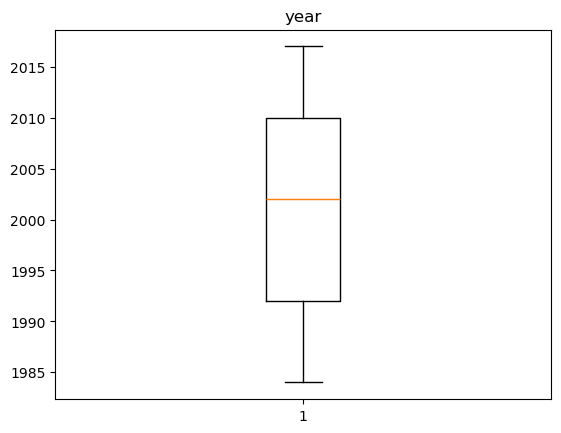

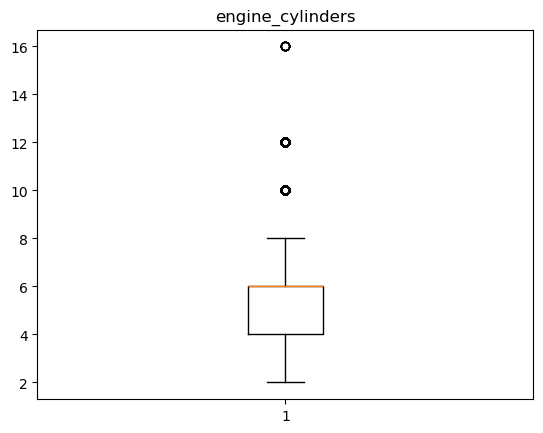

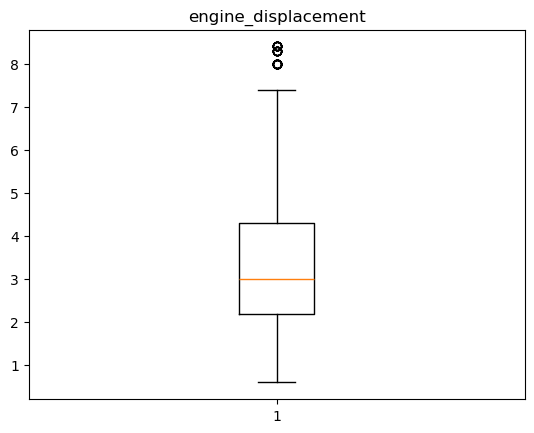

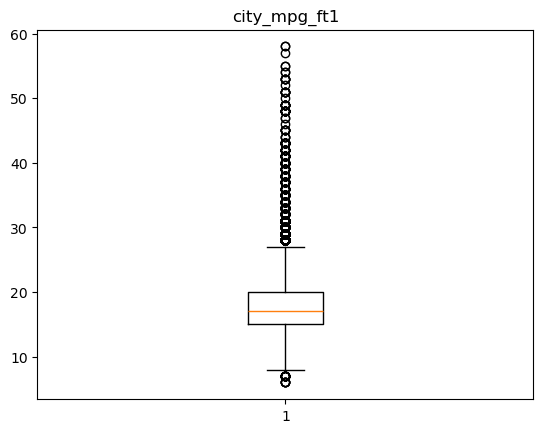

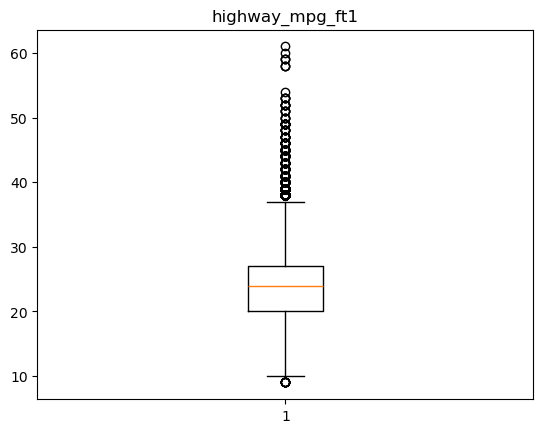

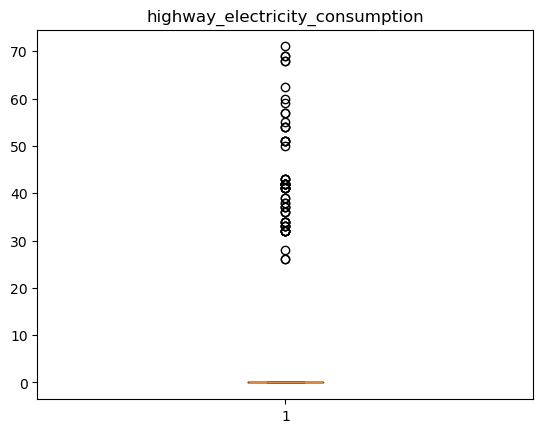

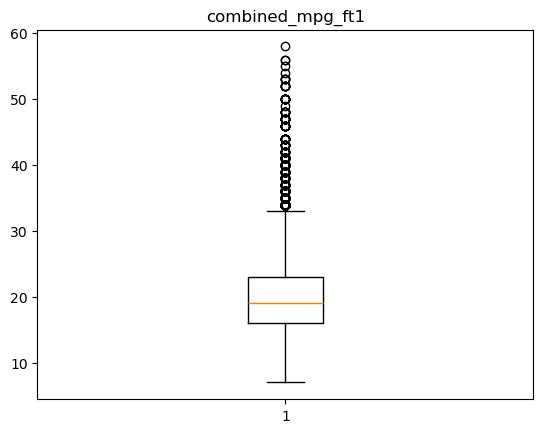

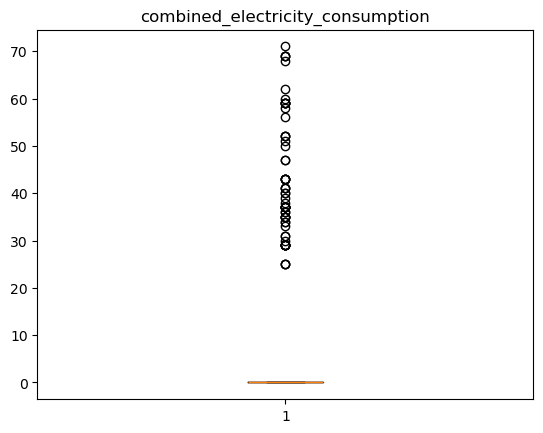

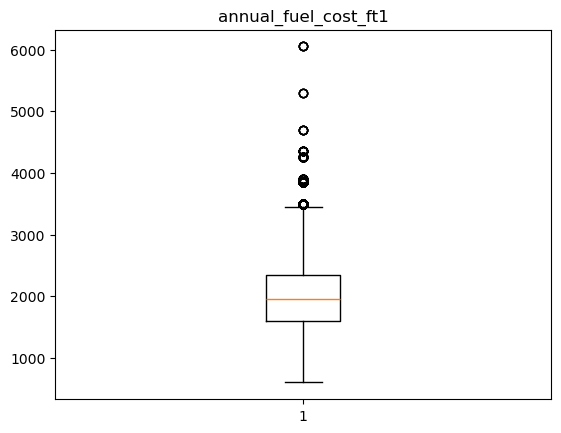

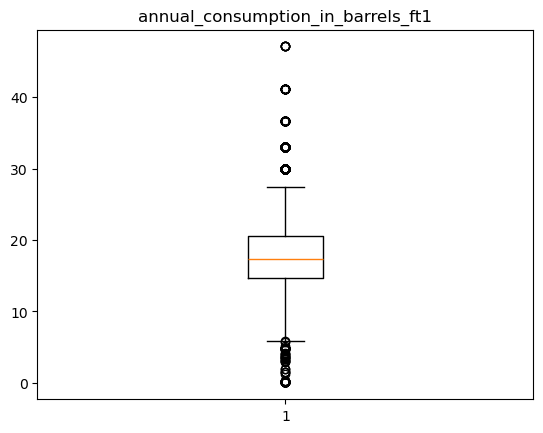

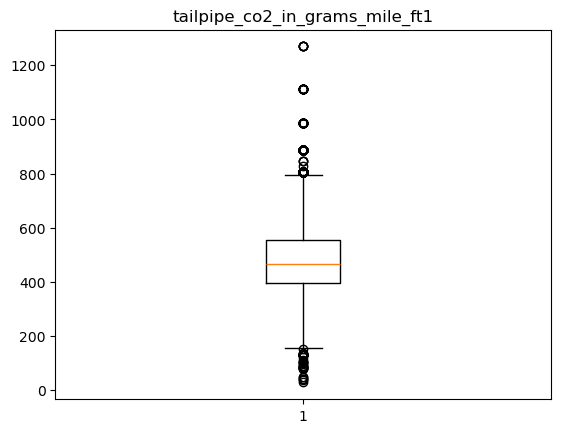

In [25]:
from matplotlib import pyplot as plt
numerical=[x for x in data.columns if data[x].dtype!="object"]
numerical.remove("gears")
#taking only the numeric columns from the dataframe.

for n in numerical:
    plt.title(n)
    plt.boxplot(data[n])
    plt.show()

In [26]:
#removing outliers
import seaborn as sns
def remove_outliers(data, col):
    iqr = 1.5 * (np.percentile(data[col],75) - np.percentile(data[col],25))
    data.drop(data[data[col] > (iqr + np.percentile(data[col],75))].index, inplace = True)
    data.drop(data[data[col] < (np.percentile(data[col],25) - iqr)].index, inplace = True)

for col in numerical:
    remove_outliers(data, col)

In [27]:
#Check for any missing values
data['engine_displacement'].isna().sum()
data['drive'].isna().sum()

0

In [28]:
data['drive'] = data['drive'].str.replace('Front-Wheel Drive','2')
data['drive'] = data['drive'].str.replace('Rear-Wheel Drive','2')
data['drive'] = data['drive'].str.replace('4-Wheel or All-Wheel Drive','4|All Wheel ')
data['drive'] = data['drive'].str.replace('All-Wheel Drive','All Wheel')
data['drive'] = data['drive'].str.replace('4-Wheel Drive','4')
data['drive'] = data['drive'].str.replace('2-Wheel Drive','2')
data['drive'] = data['drive'].str.replace('Part-time 4','4')
print(data['drive'].value_counts())

2               23580
4|All Wheel      5967
All Wheel        1907
4                1232
Name: drive, dtype: int64


In [29]:
data.info() #identify any constant columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32686 entries, 27550 to 37687
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   year                               32686 non-null  int64   
 1   make                               32686 non-null  object  
 2   model                              32686 non-null  object  
 3   class                              32686 non-null  object  
 4   drive                              32686 non-null  object  
 5   transmission                       32686 non-null  object  
 6   engine_cylinders                   32686 non-null  float64 
 7   engine_displacement                32686 non-null  float64 
 8   fuel_type_1                        32686 non-null  object  
 9   city_mpg_ft1                       32686 non-null  int64   
 10  highway_mpg_ft1                    32686 non-null  int64   
 11  highway_electricity_consumption    32

In [30]:
data = data.drop(columns = ['make','model']) #these are ID-like variables which should be removed before fitting any models

### Encoding, Scaling and Splitting the dataset<a id='encode'></a>

In [31]:
data = data[[c for c in data.columns if c != 'engine_displacement'] + ['engine_displacement']] #moving columns
data_sample = data.sample(n=5000, random_state=999).reset_index(drop=True)
target = data_sample['engine_displacement']
Data_df = data_sample.drop(columns = 'engine_displacement')

In [32]:
categorical_cols = Data_df.columns[Data_df.dtypes==object].tolist()
for col in categorical_cols:
    n = len(Data_df[col].unique())
    if n == 2:
        Data_df[col] = pd.get_dummies(Data_df[col], drop_first=True)

In [33]:
# for categorical features with >2 levels: use one-hot-encoding
Data_df = pd.get_dummies(Data_df)

In [34]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Data_df_cols = Data_df.columns
# scale Data between 0 and 1
# set the output to a data frame with correct column names
Data_df = pd.DataFrame(scaler.fit_transform(Data_df), 
                    columns=Data_df_cols)

In [35]:
from sklearn.model_selection import train_test_split
D_train, D_test, t_train, t_test = train_test_split(Data_df.values, 
                                                    target.values, 
                                                    shuffle=True,
                                                    test_size=0.3, 
                                                    random_state=999)

#After selecting our target variable and feature we will split our data into trainig and testing sets to avoid any over fitting, to check how good it learned and to measure the performance.
#training_x, testing_x, training_y, testing_y = train_test_split(x, y, test_size=0.2, random_state=42)

#D_train = training_x
#D_test = testing_x
#t_train = training_y
#t_test = testing_y

## Predictive Modelling <a id='predmod'></a>

### Feature Selection <a id='featsel'></a>

It can be observed from the shape of the transformed training data that there are 46 descriptive features that can be used for building a predictive model. 

> "The trade-off between the number of descriptive features and the density of the instances in the feature space is known as the curse of dimensionality" (Kelleher et al., 2015, p. 217)

The crux of the curse of dimensionality is that for each additional descriptive feature in the model, the dataset needs exponentially more training instances.

To minimise the effects of high dimensionality in the model, feature selection will be employed "to reduce the number of descriptive features in a dataset to just the subset that is most useful" (Kelleher et al., 2015, p. 218).

By using different algorithms to determine which features in the training dataset are the most important, the number of features used for the predictive modelling can be reduced accordingly. This will improve the model performance by mitigating the risk of overfitting, and reduce the training and computational time associated with each model used as part of the evaluation process without significantly impacting the predictive power of the models.

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv_method = RepeatedKFold(n_splits=5,
                          n_repeats=3,
                          random_state=999)

In [37]:
dt_reg = DecisionTreeRegressor(random_state=999)

In [38]:
cv_results_full = cross_val_score(estimator=dt_reg,
                             X=D_train,
                             y=t_train, 
                             cv=cv_method,
                             scoring = 'r2')
cv_results_full.mean().round(3)

0.88

In [39]:
num_features = 5

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [41]:
from sklearn import feature_selection as fs

In [42]:
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_regression, k=num_features)
fs_fit_mutual_info.fit_transform(D_train, t_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
best_features_mutual_info = Data_df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['engine_cylinders', 'tailpipe_co2_in_grams_mile_ft1',
       'annual_fuel_cost_ft1', 'city_mpg_ft1',
       'annual_consumption_in_barrels_ft1'], dtype=object)

In [43]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.97442354, 0.75045862, 0.69979547, 0.69699344, 0.68323136])

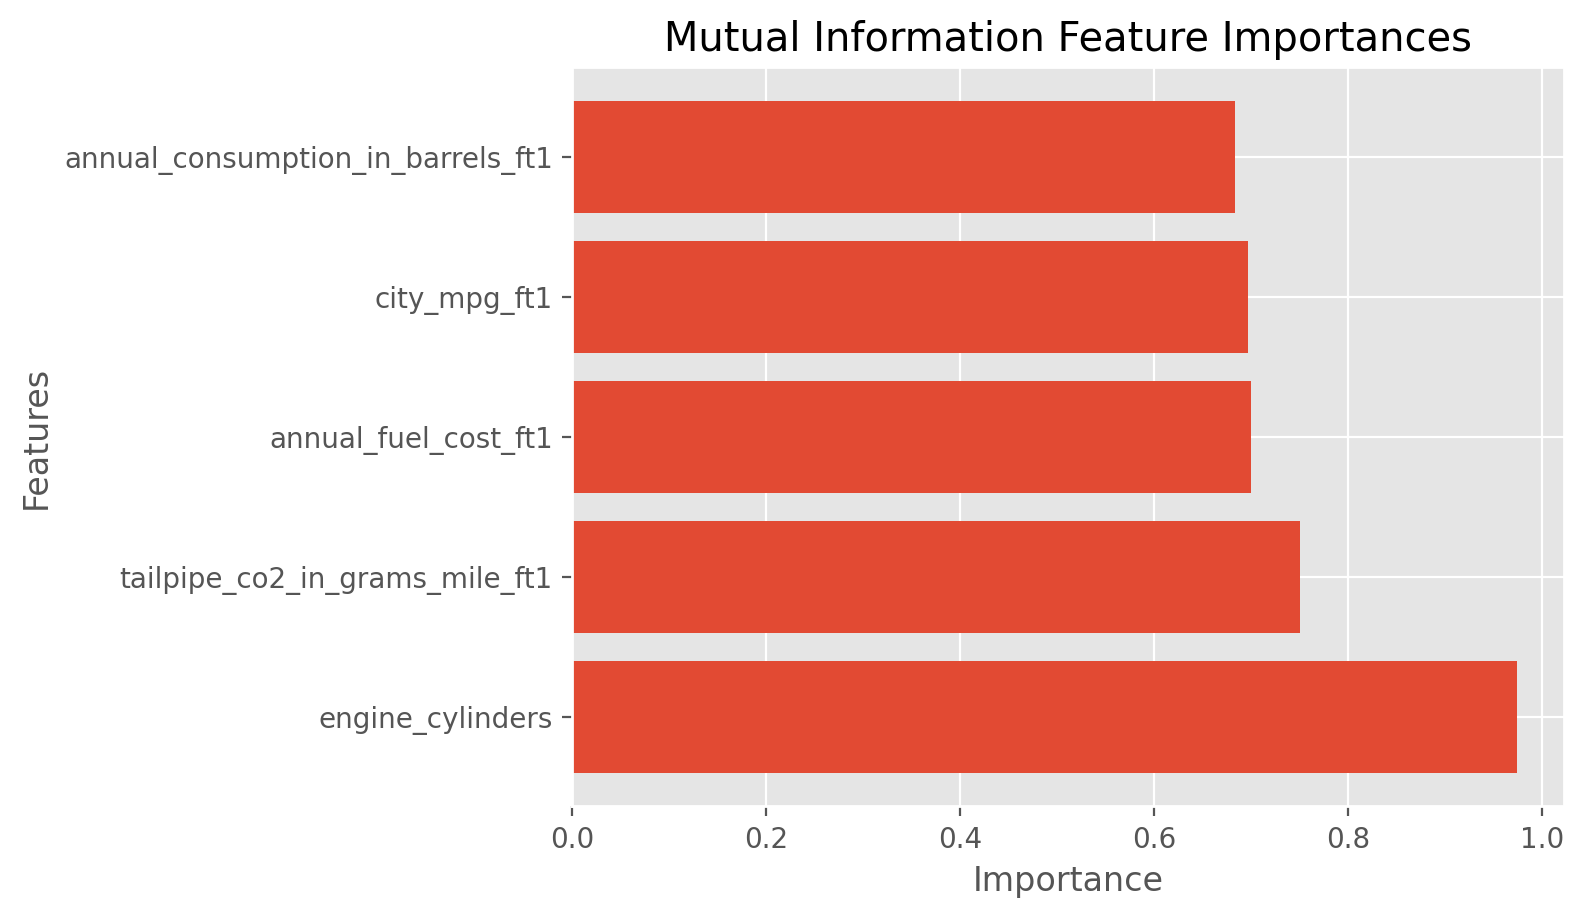

In [44]:
plot_imp(best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information')

In [45]:
cv_results_mutual_info = cross_val_score(estimator=dt_reg,
                             X=D_train[:, fs_indices_mutual_info],
                             y=t_train, 
                             cv=cv_method,
                             scoring = 'r2')
cv_results_mutual_info.mean().round(3)

0.881

In [46]:
print(f'Full Set of Features (with {D_train.shape[1]} Features):', cv_results_full.mean().round(3))
print(f'Feature Selection with {num_features} Features:')
print('Mutual Information:', cv_results_mutual_info.mean().round(3))

Full Set of Features (with 46 Features): 0.88
Feature Selection with 5 Features:
Mutual Information: 0.881


In [47]:
from scipy import stats

In [48]:
print('P-Value for Full vs Mutual Information:', stats.ttest_rel(cv_results_full, cv_results_mutual_info).pvalue.round(3))

P-Value for Full vs Mutual Information: 0.828


In [49]:
D_train_fs = D_train[:, fs_indices_mutual_info]
D_test_fs = D_test[:, fs_indices_mutual_info]

Mutual information algorithm has been used for identifying the 5 features from the training dataset with the highest importance scores. Mutual information  measures the reduction in uncertainty (or entropy) for one descriptive feature given the value of the target feature. Where enthropy is reduced, information is said to be gained about the target feature.

For the target of engine displacement, the 5 descriptive features with the highest importance scores were engine_cylinders', 'tailpipe_co2_in_grams_mile_ft1', 'annual_fuel_cost_ft1', 'annual_consumption_in_barrels_ft1', and 'city_mpg_ft1.

Using these 5 descriptive features as a subset of the original 46 has yielded a slightly better r-squared (0.001) value which suggests a better fit for the target variable.

To support using only the 5 selected features instead of the full training set, the p-value of the two cross validation scores is computed, and found not to be statisticially significant. This suggests that for model fitting and tuning, the features selected can be used without impacting the predictive powers of the models.

By reducing the number of features used for fitting models, there is less risk of overfitting when the models are tested on the target data set, as well as improved training and computation time.

### Model Fitting & Tuning <a id='tuning'></a>

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.model_selection import KFold, GridSearchCV

In [51]:
cv_method_train = KFold(n_splits=5,shuffle = True,random_state=999)
params_KNN = {'n_neighbors': np.arange(1, 30), 'p': [1, 2]}

gs_KNN = GridSearchCV(estimator=KNeighborsRegressor(), 
                      param_grid=params_KNN, 
                      cv=cv_method_train,
                      verbose=1,
                      scoring='neg_mean_squared_error')

In [52]:
gs_KNN.fit(D_train_fs, t_train);
print('Hyperparameter tuning for KNN:')
print('Parameters:', gs_KNN.best_params_)
print('Best Score:', gs_KNN.best_score_)

Fitting 5 folds for each of 58 candidates, totalling 290 fits
Hyperparameter tuning for KNN:
Parameters: {'n_neighbors': 13, 'p': 2}
Best Score: -0.1831273879966188


In [53]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2], ["Manhattan", "Euclidean"])

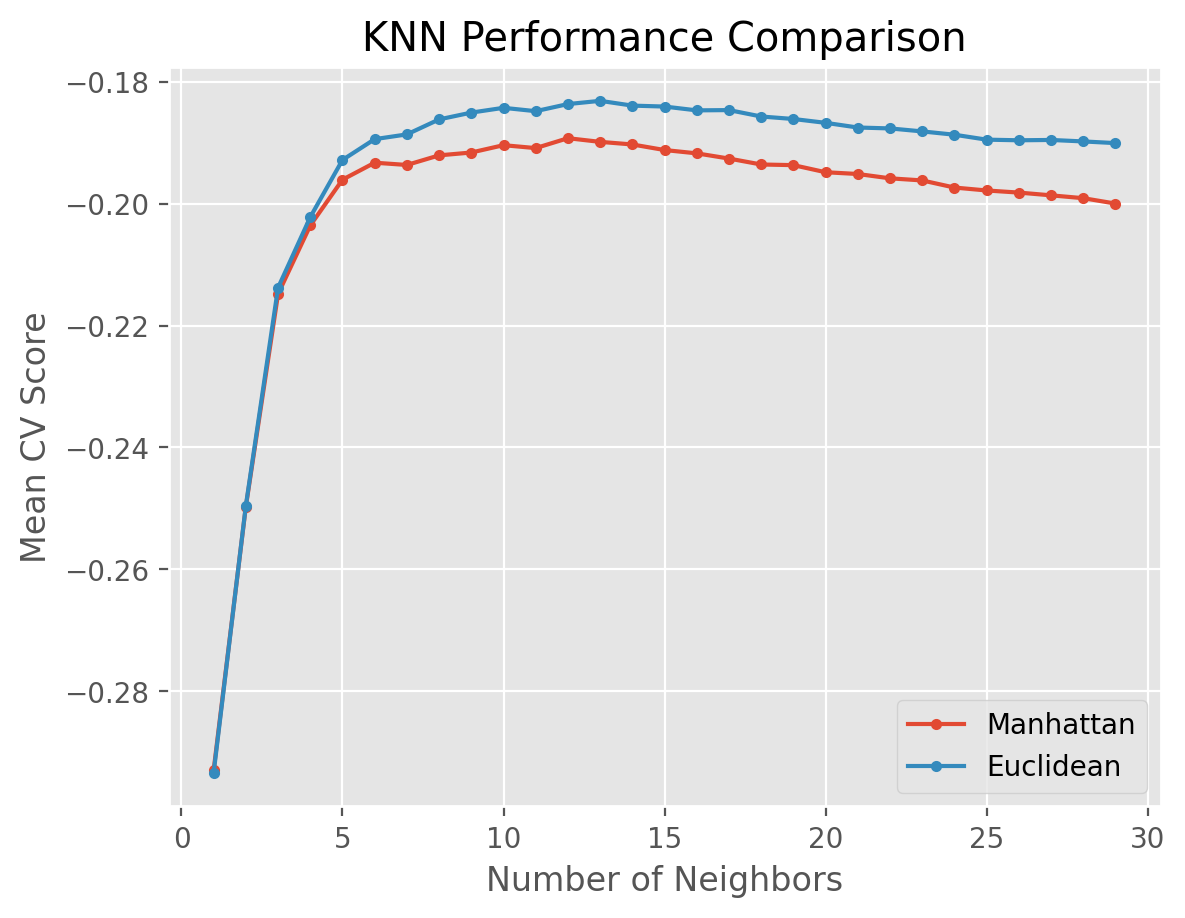

In [54]:
for i in ["Manhattan", "Euclidean"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

In [56]:
# Nearest Neighbour Regressor Score
model_KNN = KNeighborsRegressor(n_neighbors = gs_KNN.best_params_['n_neighbors'],
                                p = gs_KNN.best_params_['p'])#determined from hyperparameter tuning to minmise MSE
model_KNN.fit(D_train_fs, t_train)
predict_y_KNN = model_KNN.predict(D_test_fs)
KNN_mse = mean_squared_error(t_test, predict_y_KNN)
print(f'Nearest Neighbour Regressor MSE: {KNN_mse}')

Nearest Neighbour Regressor MSE: 0.18119420118343196


In [57]:
KNN_scores = cross_val_score(model_KNN, D_test_fs, t_test, cv=cv_method, scoring='r2')
KNN_scores.mean().round(3)

0.865

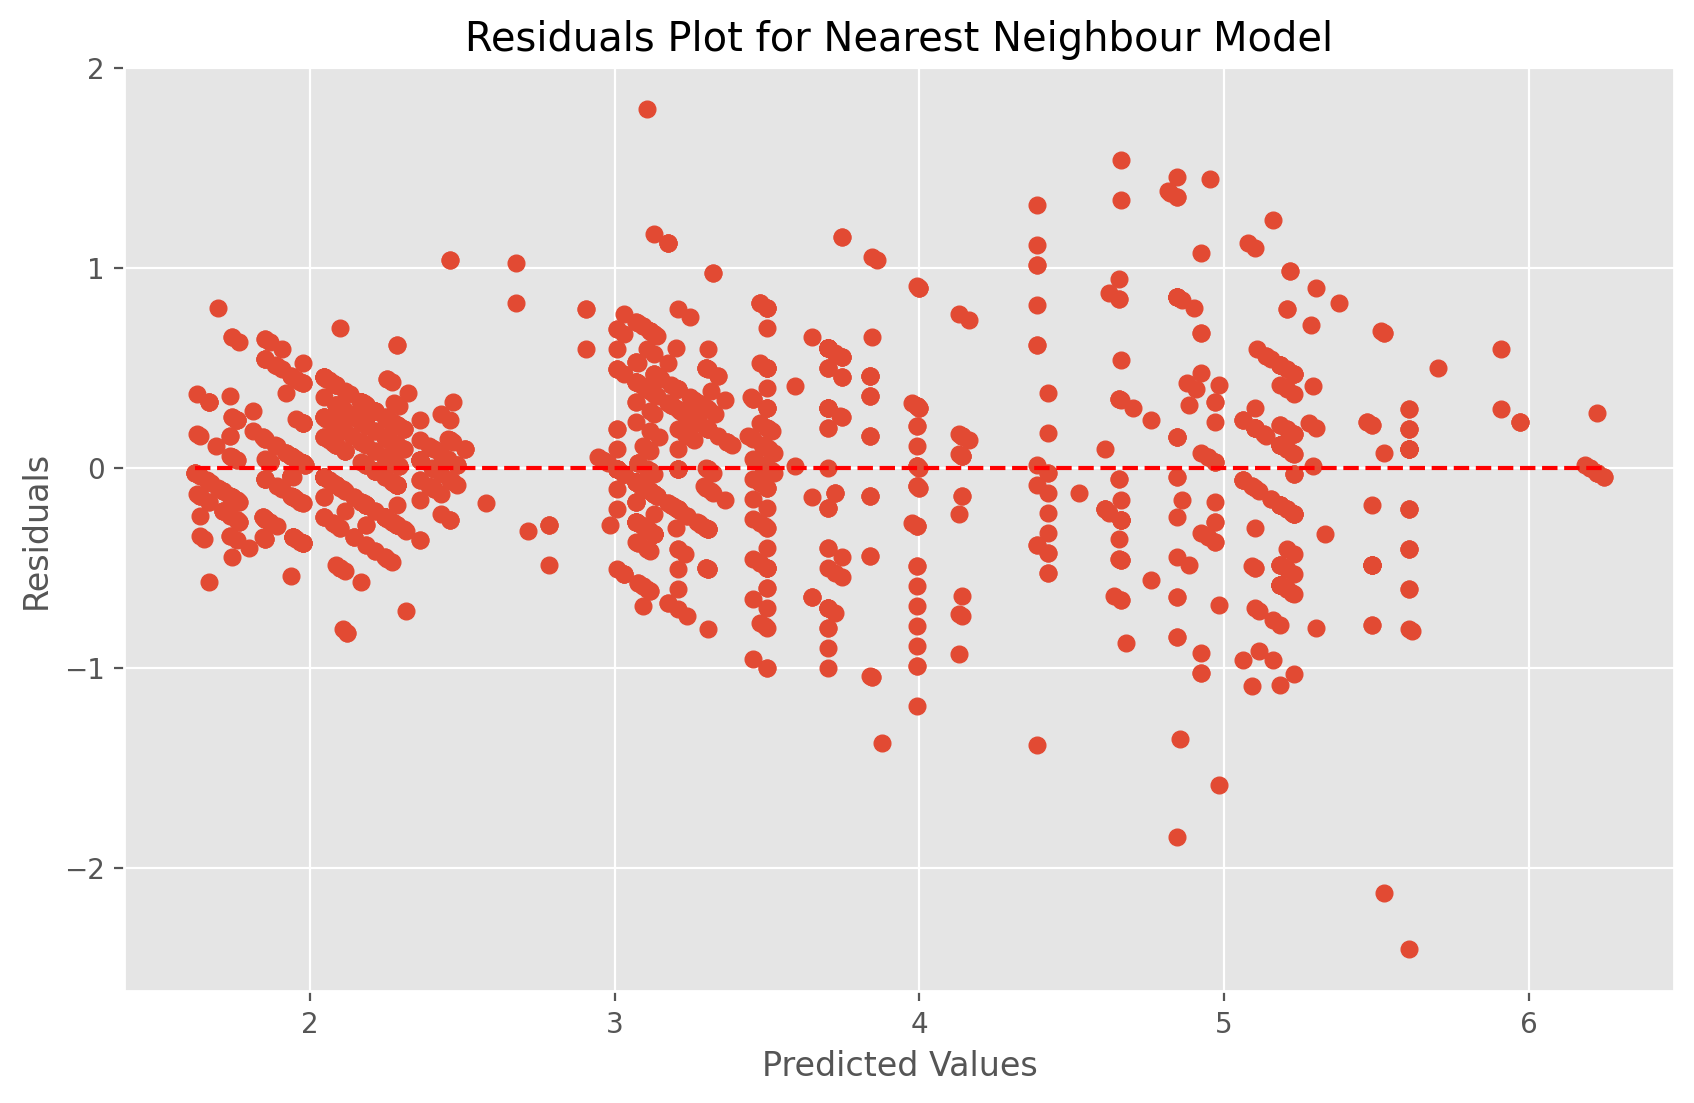

In [58]:
# Residual plot for KNN
residuals_KNN = t_test - predict_y_KNN
plt.figure(figsize=(10, 6))
plt.scatter(predict_y_KNN, residuals_KNN)
plt.hlines(y=0, xmin=predict_y_KNN.min(), xmax=predict_y_KNN.max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Nearest Neighbour Model")
plt.show()

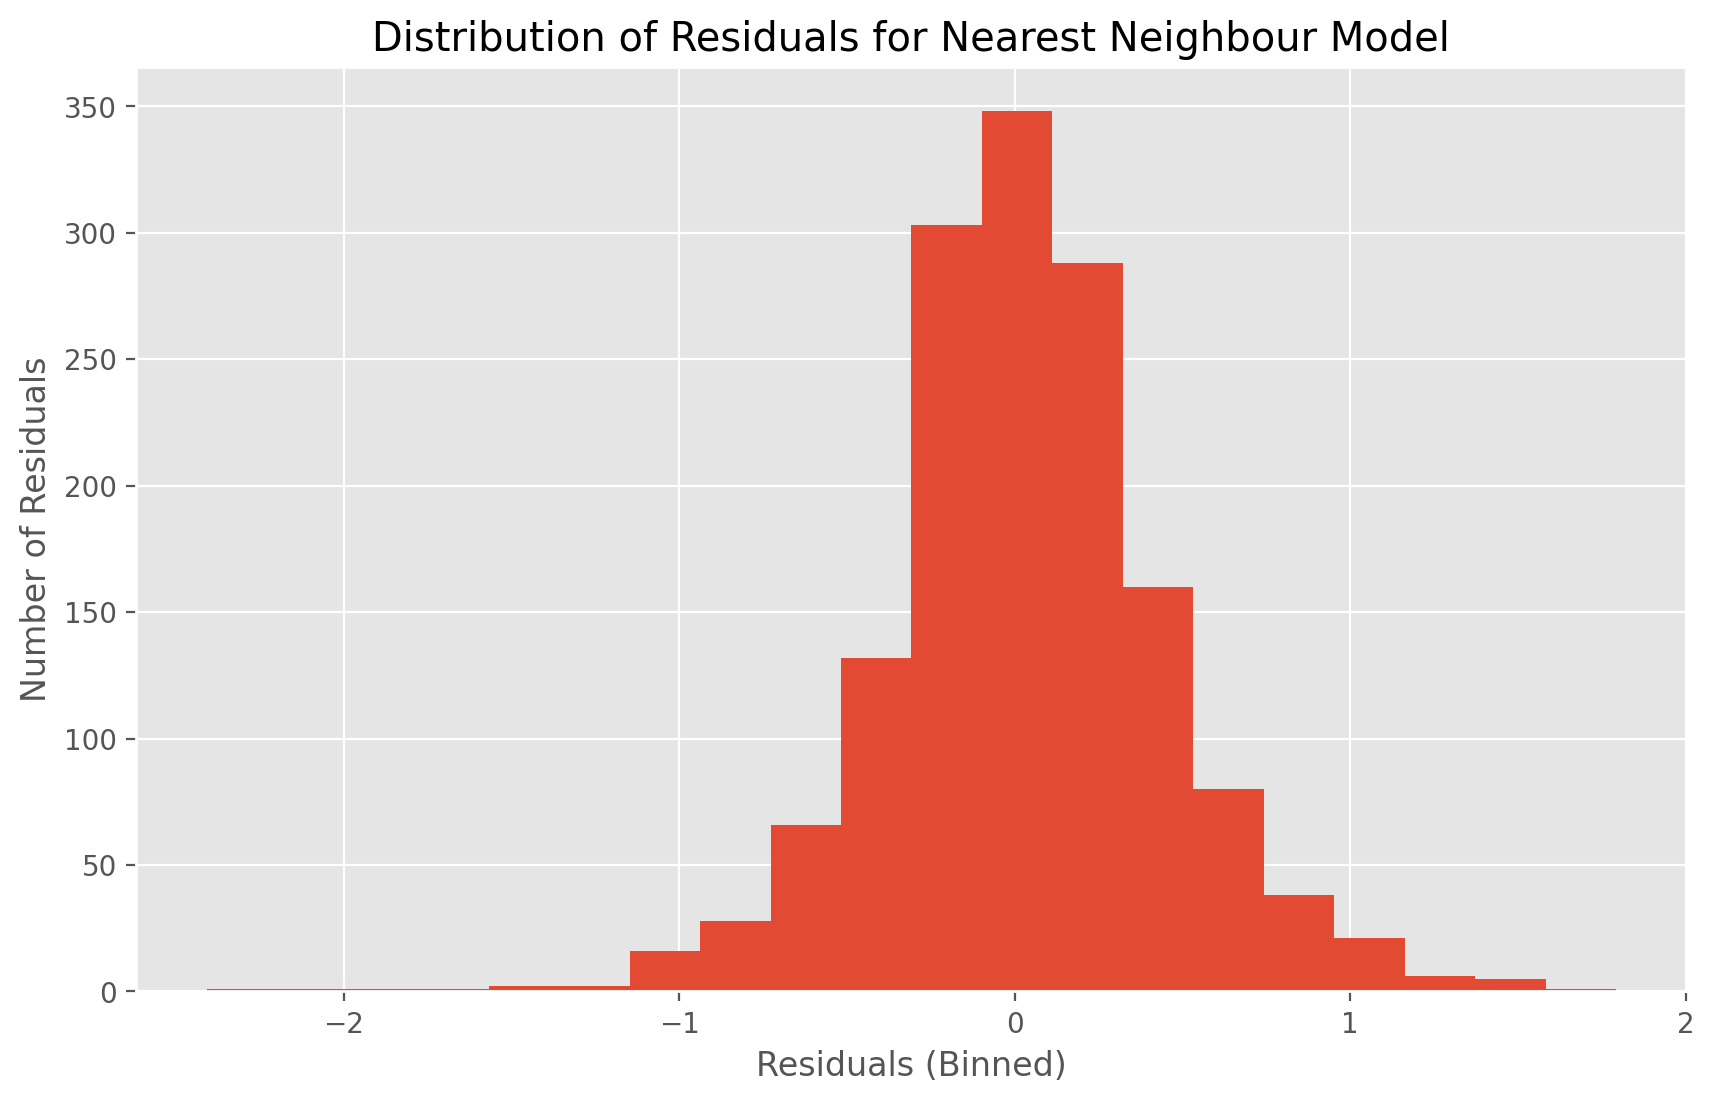

In [59]:
# Residual plot for KNN
residuals_KNN = t_test - predict_y_KNN
plt.figure(figsize=(10, 6))
plt.hist(residuals_KNN,20)
plt.xlabel("Residuals (Binned)")
plt.ylabel("Number of Residuals")
plt.title("Distribution of Residuals for Nearest Neighbour Model")
plt.show()

DecisionTreeRegressor

In [60]:

params_DT = {'max_depth': np.arange(1,12,1),
             'min_samples_split': [2, 5, 15, 20, 25]}
            
gs_DT = GridSearchCV(estimator=DecisionTreeRegressor(), 
                     param_grid=params_DT, 
                     cv=cv_method_train,
                     verbose=1, 
                     scoring='neg_mean_squared_error')

gs_DT.fit(D_train_fs, t_train);
print('Hyperparameter tuning for DT:')
print('Parameters:', gs_DT.best_params_)
print('Best Score:', gs_DT.best_score_)

Fitting 5 folds for each of 55 candidates, totalling 275 fits
Hyperparameter tuning for DT:
Parameters: {'max_depth': 6, 'min_samples_split': 2}
Best Score: -0.18241895618255274


In [61]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']

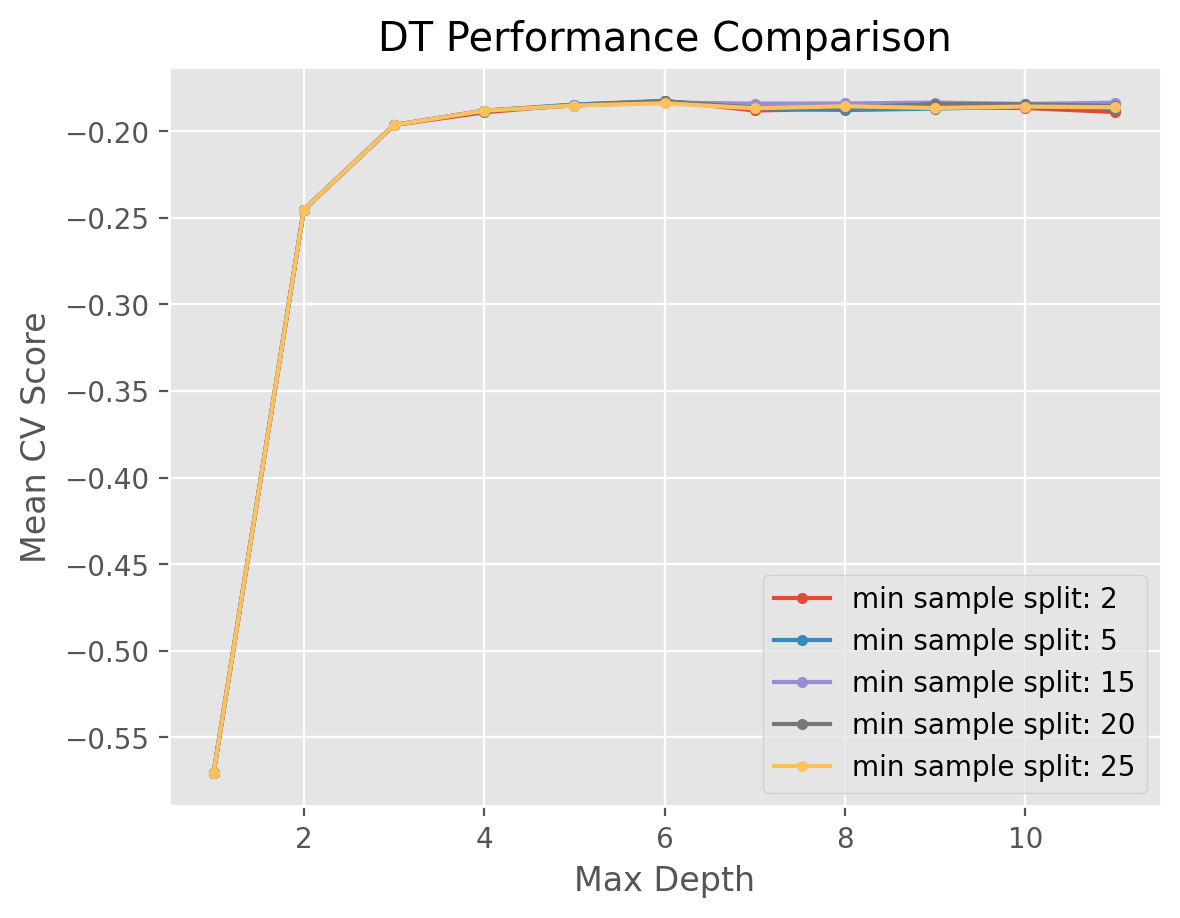

In [62]:
for i in [2, 5, 15, 20, 25]:
    temp = results_DT[results_DT['min_samples_split'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = 'min sample split: ' + str(i))
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

In [63]:
# Decision Tree Regressor Score
model_DT = DecisionTreeRegressor(max_depth = gs_DT.best_params_['max_depth'], 
                                 min_samples_split = gs_DT.best_params_['min_samples_split'])#determined from hyperparameter tuning to minmise MSE
model_DT.fit(D_train_fs, t_train)
predict_y_DT = model_DT.predict(D_test_fs)
DT_mse = mean_squared_error(t_test, predict_y_DT)
print(f'Decision Tree Regressor MSE: {DT_mse}')

Decision Tree Regressor MSE: 0.18933154044344977


In [64]:
DT_scores = cross_val_score(model_DT, D_test_fs, t_test, cv=cv_method, scoring='r2')
DT_scores.mean().round(3)

0.871

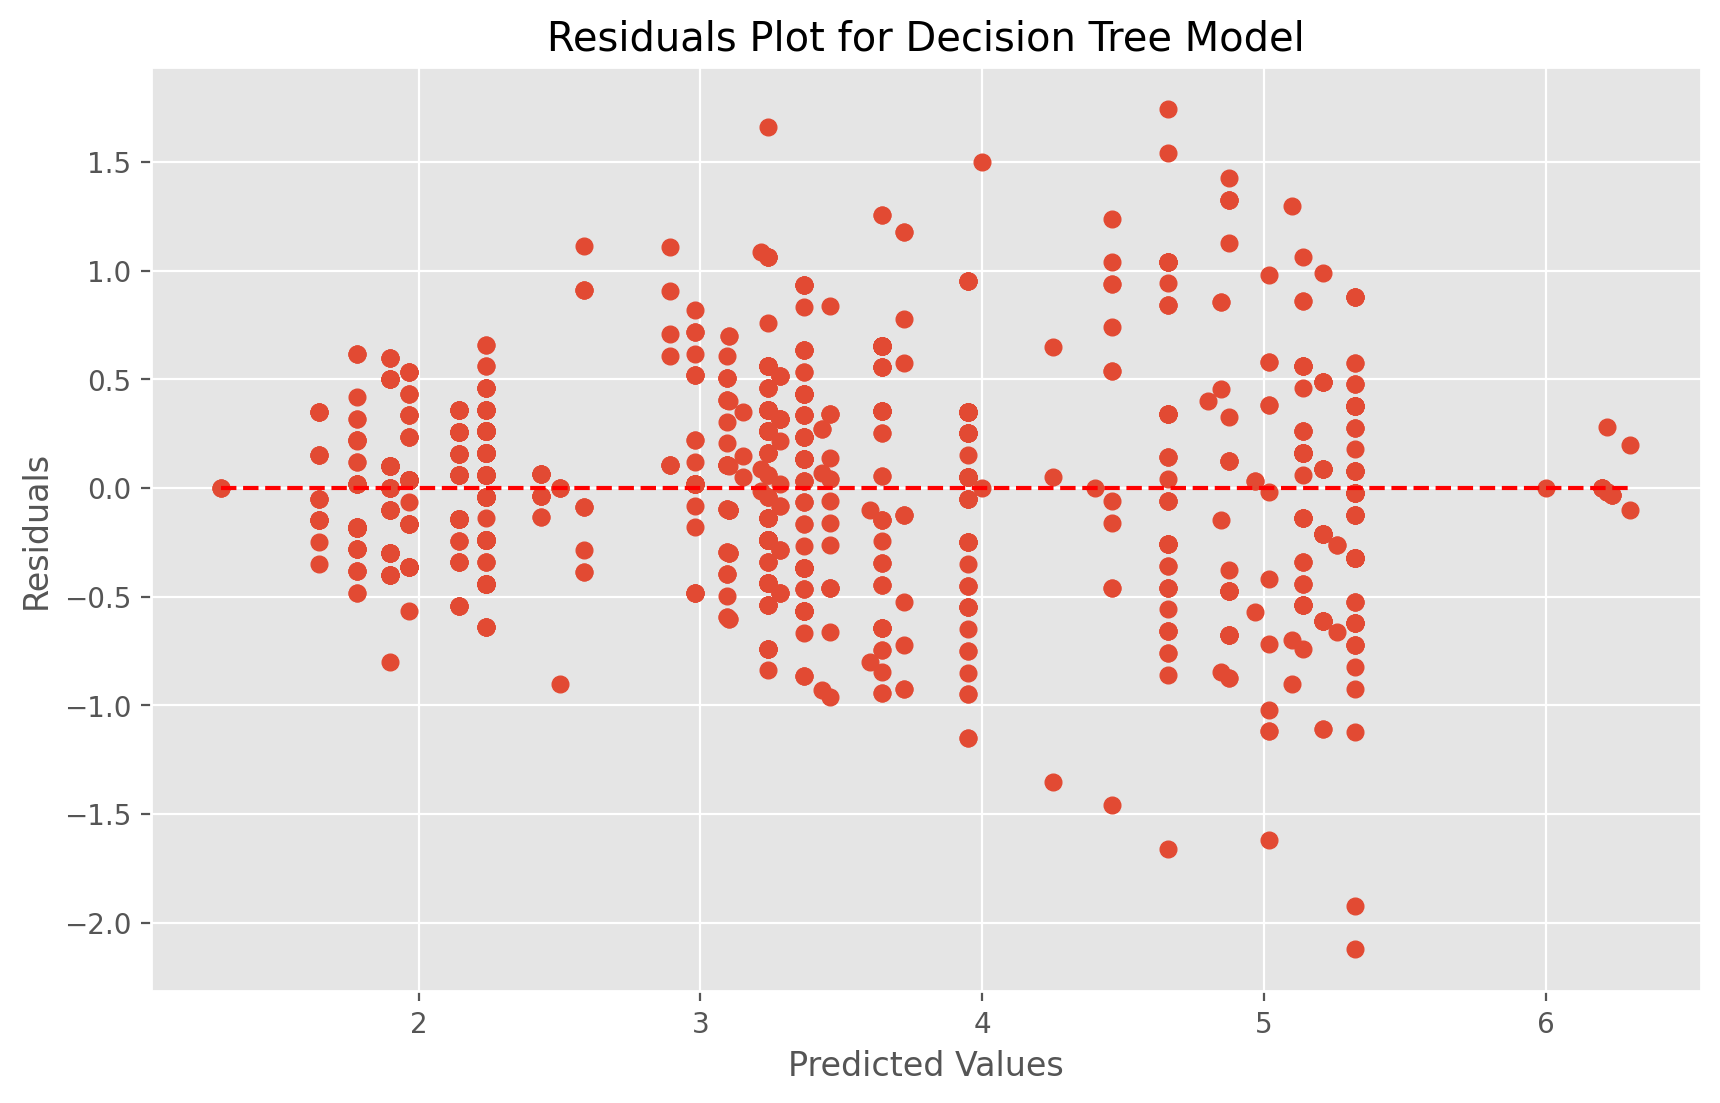

In [65]:
# Residual plot for DT
residuals_DT = t_test - predict_y_DT
plt.figure(figsize=(10, 6))
plt.scatter(predict_y_DT, residuals_DT)
plt.hlines(y=0, xmin=predict_y_DT.min(), xmax=predict_y_DT.max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Decision Tree Model")
plt.show()

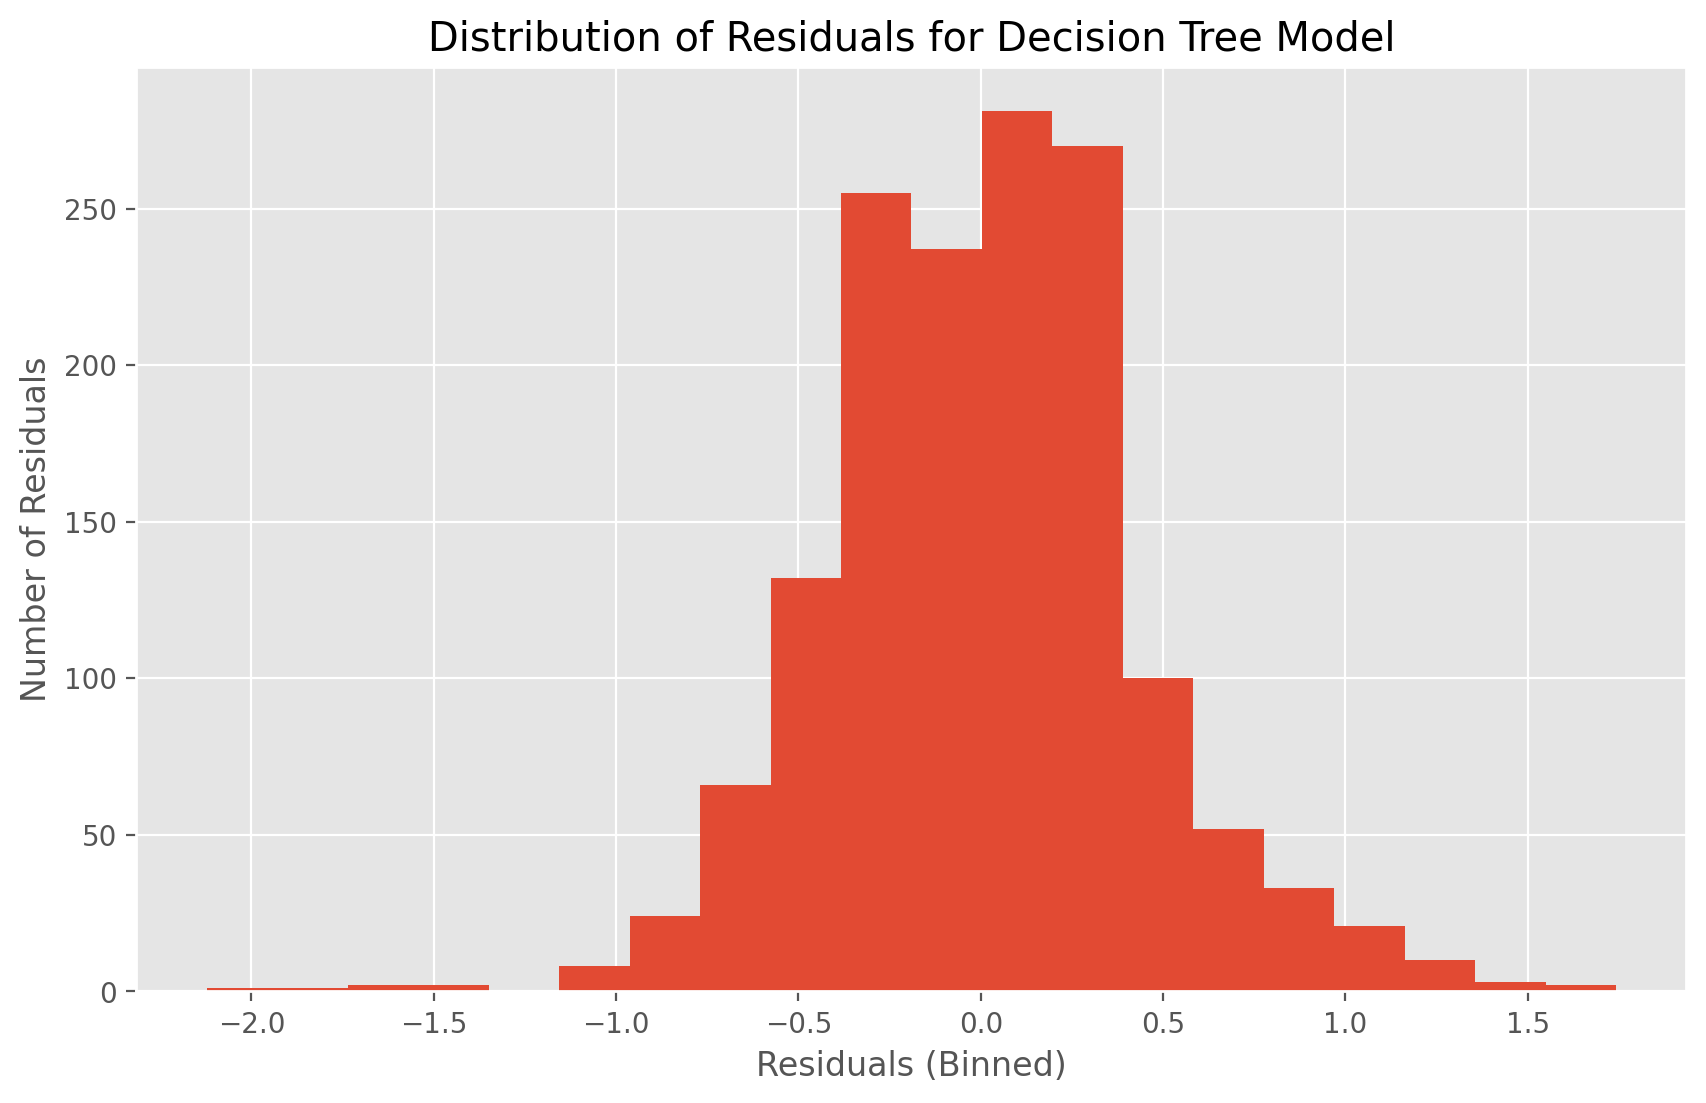

In [66]:
# Residual plot for DT
residuals_DT = t_test - predict_y_DT
plt.figure(figsize=(10, 6))
plt.hist(residuals_DT,20)
plt.xlabel("Residuals (Binned)")
plt.ylabel("Number of Residuals")
plt.title("Distribution of Residuals for Decision Tree Model")
plt.show()

GradientBoostingRegressor

In [67]:
params_GBR = {'n_estimators': np.arange(0,500,20)}
            
gs_GBR = GridSearchCV(estimator=GradientBoostingRegressor(), 
                     param_grid=params_GBR, 
                     cv=cv_method_train,
                     verbose=1, 
                     scoring='neg_mean_squared_error')

gs_GBR.fit(D_train_fs, t_train);
print('Hyperparameter tuning for grb:')
print('Parameters:', gs_GBR.best_params_)
print('Best Score:', gs_GBR.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Hyperparameter tuning for grb:
Parameters: {'n_estimators': 200}
Best Score: -0.1723373198030791


In [68]:
results_GBR = pd.DataFrame(gs_GBR.cv_results_['params'])
results_GBR['test_score'] = gs_GBR.cv_results_['mean_test_score']

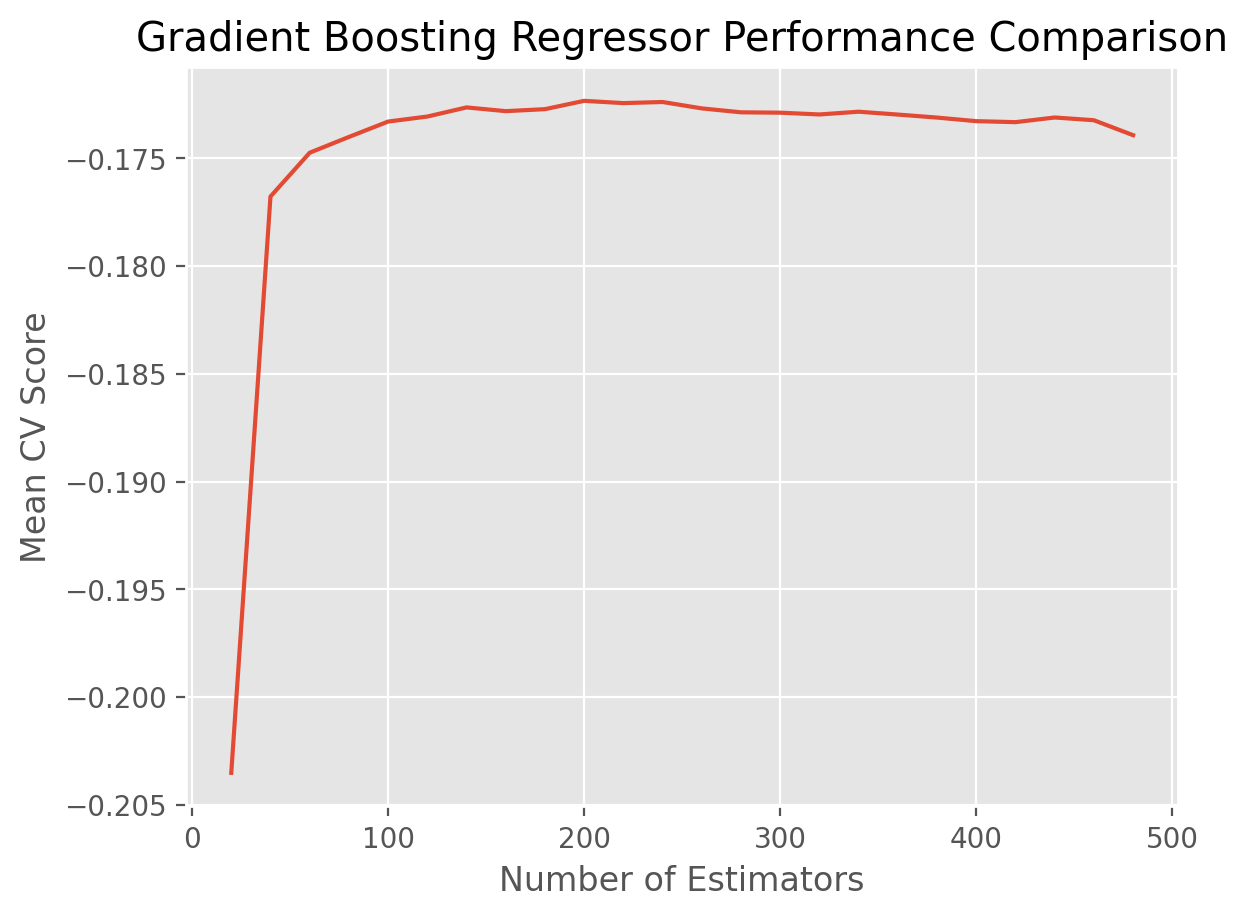

In [69]:
plt.plot(results_GBR['n_estimators'],results_GBR['test_score'])
plt.xlabel('Number of Estimators')
plt.ylabel("Mean CV Score")
plt.title("Gradient Boosting Regressor Performance Comparison")
plt.show()

In [70]:
# Gradient Boosting Regressor
model_GBR = GradientBoostingRegressor(n_estimators = gs_GBR.best_params_['n_estimators']) #determined from hyperparameter tuning to minmise MSE
model_GBR.fit(D_train_fs, t_train)
predict_y_GBR = model_GBR.predict(D_test_fs)
GBR_mse = mean_squared_error(t_test, predict_y_GBR)
print(f'Gradient Boosting Regressor MSE: {GBR_mse}')

#Mean Squared Error for Gradient Booster Regressor is 0.17721173498814596 which is very low and indicates that the models prediction are very close to the true value and is making very accurate predictions.

Gradient Boosting Regressor MSE: 0.17721173498814596


In [71]:
GBR_scores = cross_val_score(model_GBR, D_test_fs, t_test, cv=cv_method, scoring='r2')
GBR_scores.mean().round(3)

0.873

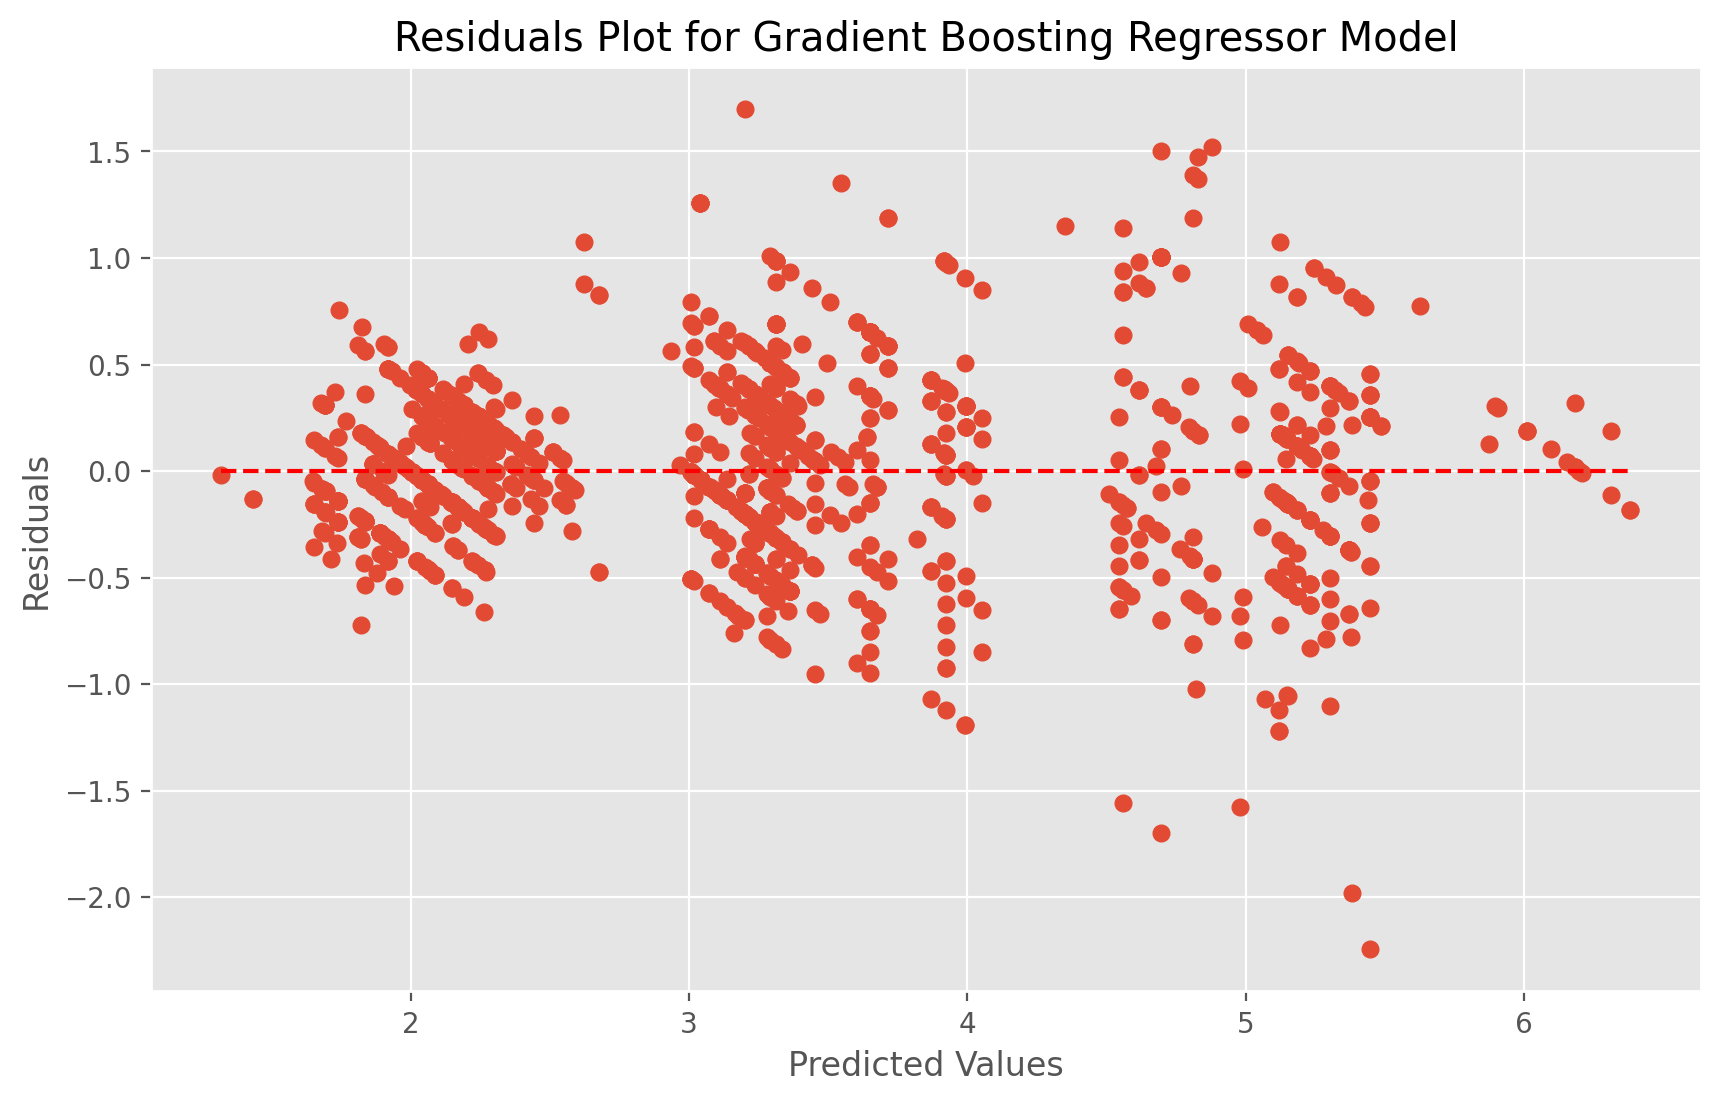

In [72]:
# Residual plot for GBR
residuals_GBR = t_test - predict_y_GBR
plt.figure(figsize=(10, 6))
plt.scatter(predict_y_GBR, residuals_GBR)
plt.hlines(y=0, xmin=predict_y_GBR.min(), xmax=predict_y_GBR.max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Gradient Boosting Regressor Model")
plt.show()

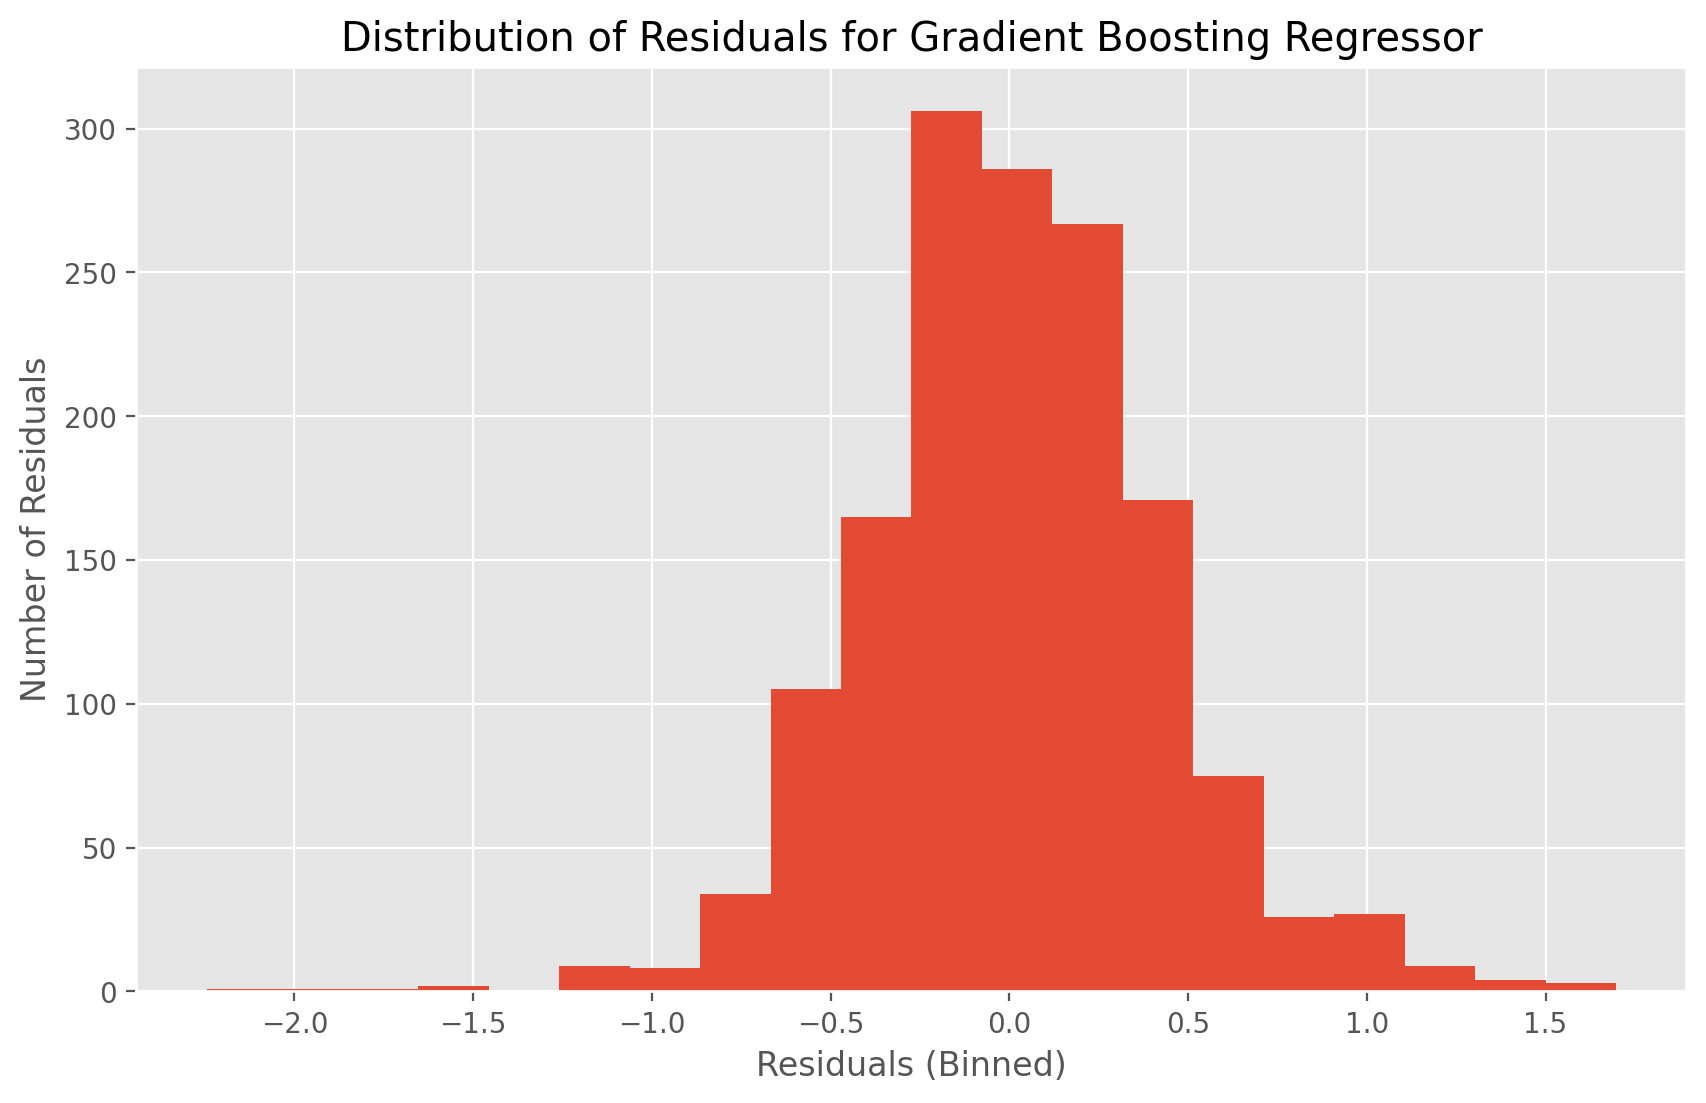

In [73]:
# Residual plot for GBR
residuals_GBR = t_test - predict_y_GBR
plt.figure(figsize=(10, 6))
plt.hist(residuals_GBR,20)
plt.xlabel("Residuals (Binned)")
plt.ylabel("Number of Residuals")
plt.title("Distribution of Residuals for Gradient Boosting Regressor")
plt.show()

MLPRegressor

In [74]:
# Neural Network using MLPRegressor

params_NNM = {'activation': ['relu', 'tanh'],
              'max_iter': np.arange(100,500,100)}
            
gs_NNM = GridSearchCV(estimator=MLPRegressor(hidden_layer_sizes=(64, 32), solver='adam'), 
                     param_grid=params_NNM, 
                     cv=cv_method_train,
                     verbose=1, 
                     scoring='neg_mean_squared_error')
gs_NNM.fit(D_train_fs, t_train);
print('Hyperparameter tuning for NNM:')
print('Parameters:', gs_NNM.best_params_)
print('Best Score:', gs_NNM.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Hyperparameter tuning for NNM:
Parameters: {'activation': 'relu', 'max_iter': 400}
Best Score: -0.17510264540075812


In [75]:
results_NNM = pd.DataFrame(gs_NNM.cv_results_['params'])
results_NNM['test_score'] = gs_NNM.cv_results_['mean_test_score']

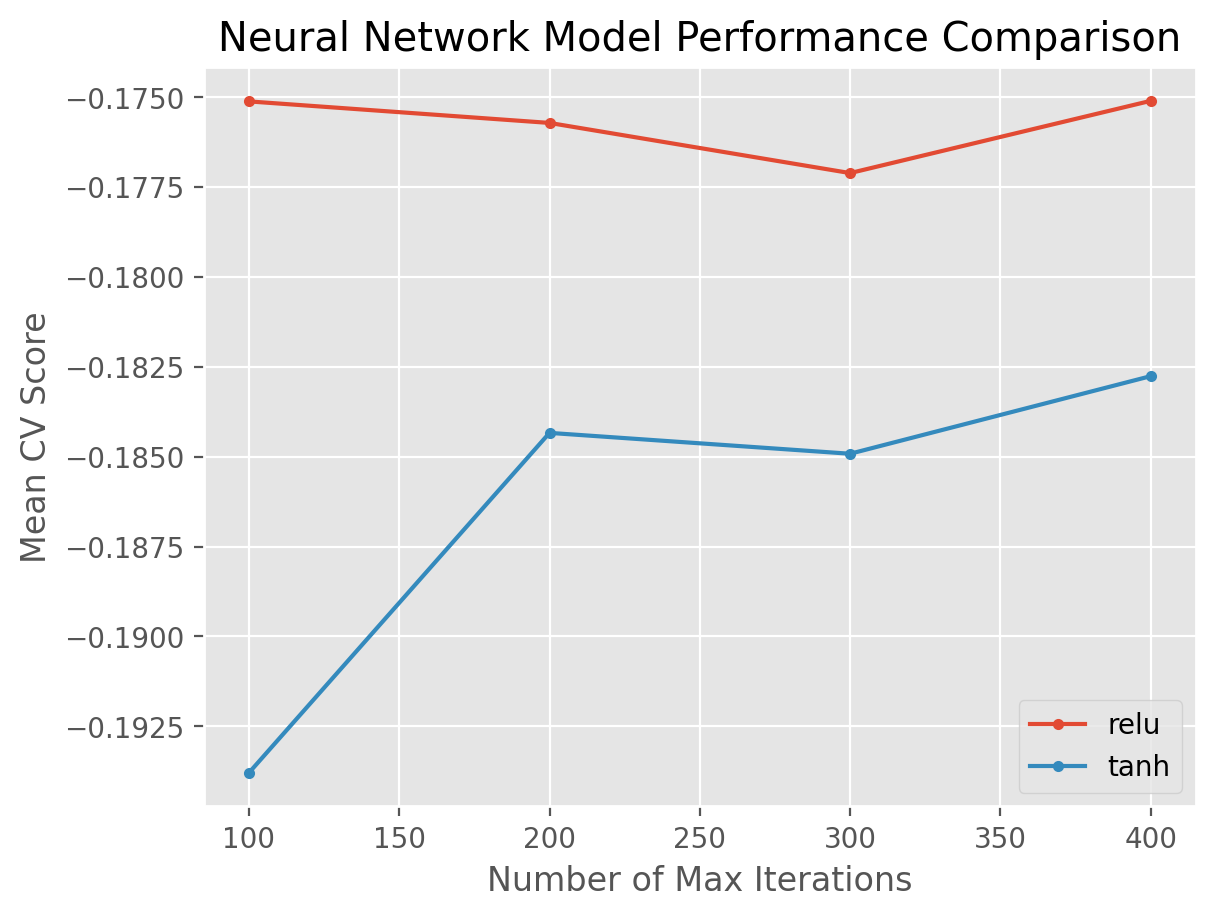

In [76]:
for i in ['relu', 'tanh']:
    temp = results_NNM[results_NNM['activation'] == i]
    plt.plot(temp['max_iter'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Max Iterations')
plt.ylabel("Mean CV Score")
plt.title("Neural Network Model Performance Comparison")
plt.show()

In [77]:
neural_network_model = MLPRegressor(hidden_layer_sizes=(64, 32), 
                                    activation=gs_NNM.best_params_['activation'], 
                                    solver='adam', 
                                    max_iter=gs_NNM.best_params_['max_iter'])
neural_network_model.fit(D_train_fs, t_train)
predict_nn_y = neural_network_model.predict(D_test_fs)
mse_neural_network = mean_squared_error(t_test, predict_nn_y)
print(f'Neural Network MSE: {mse_neural_network}')

Neural Network MSE: 0.19032233469251583


In [78]:
NNM_scores = cross_val_score(neural_network_model, D_test_fs, t_test, cv=cv_method, scoring='r2')
NNM_scores.mean().round(3)

0.875

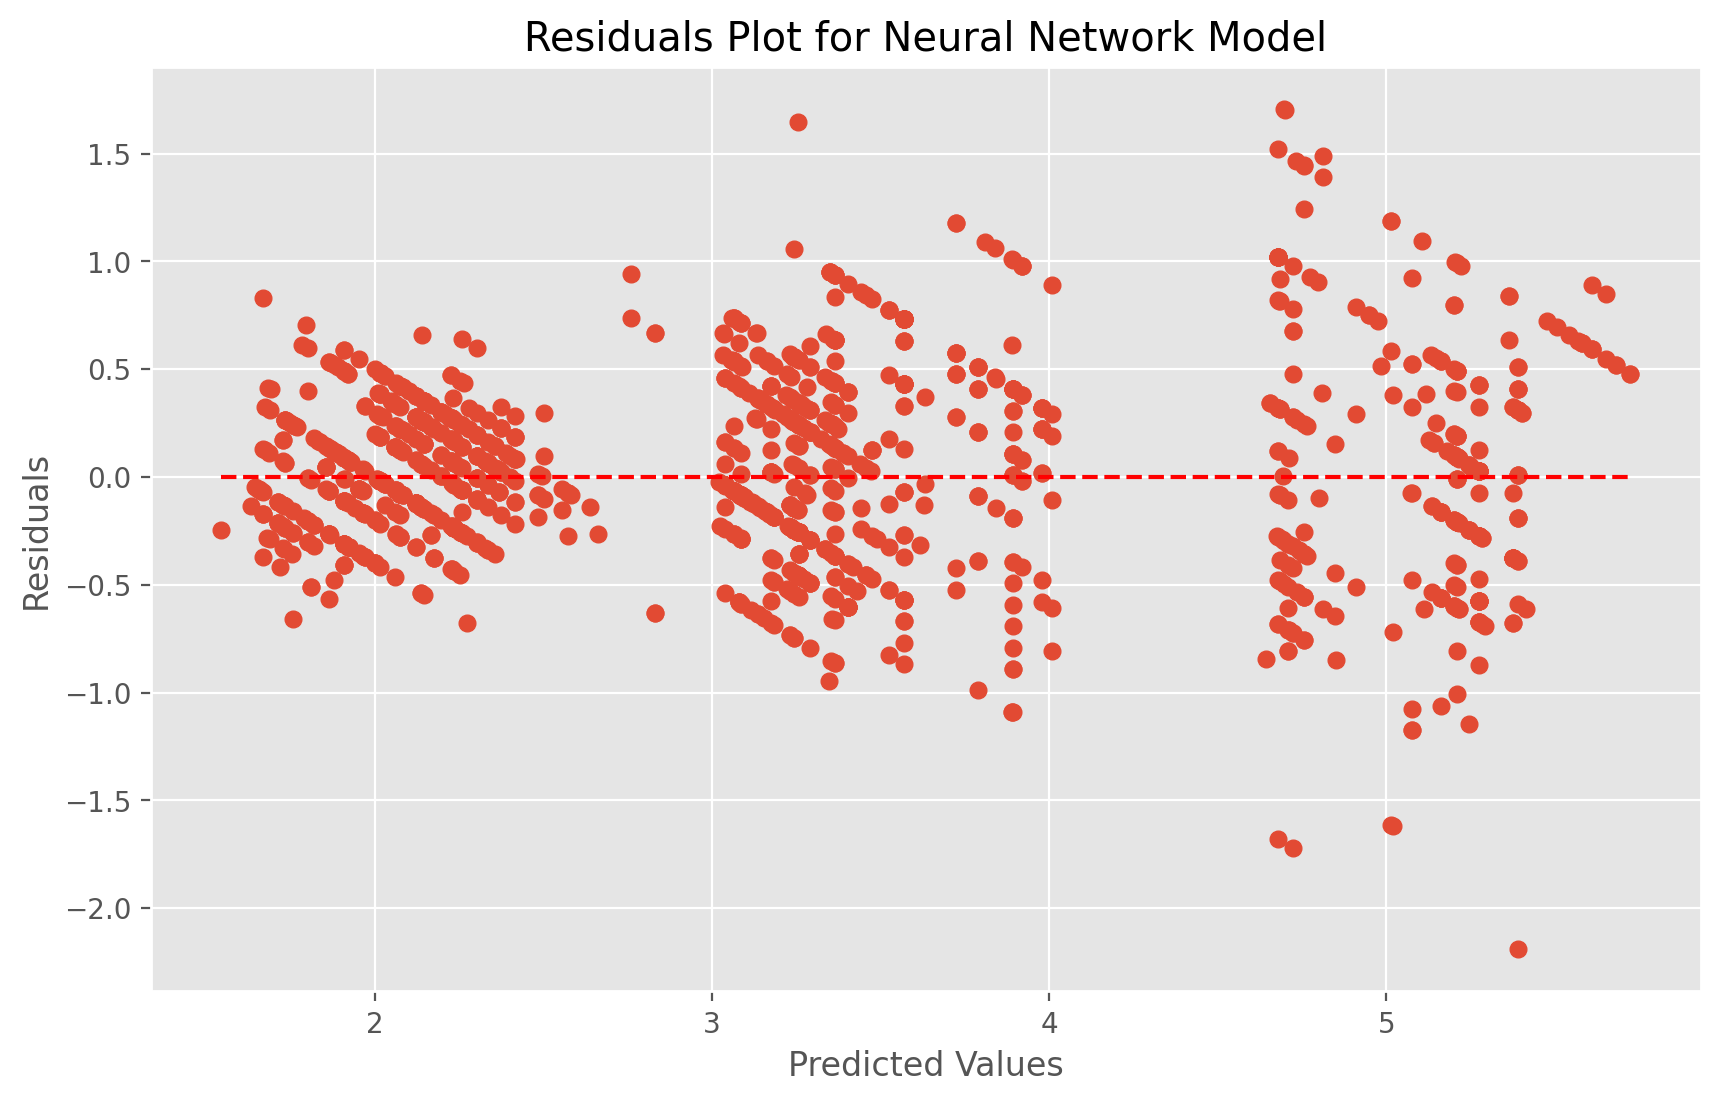

In [79]:
# Residual plot for NNM
residuals_NNM = t_test - predict_nn_y
plt.figure(figsize=(10, 6))
plt.scatter(predict_nn_y, residuals_NNM)
plt.hlines(y=0, xmin=predict_nn_y.min(), xmax=predict_nn_y.max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Neural Network Model")
plt.show()

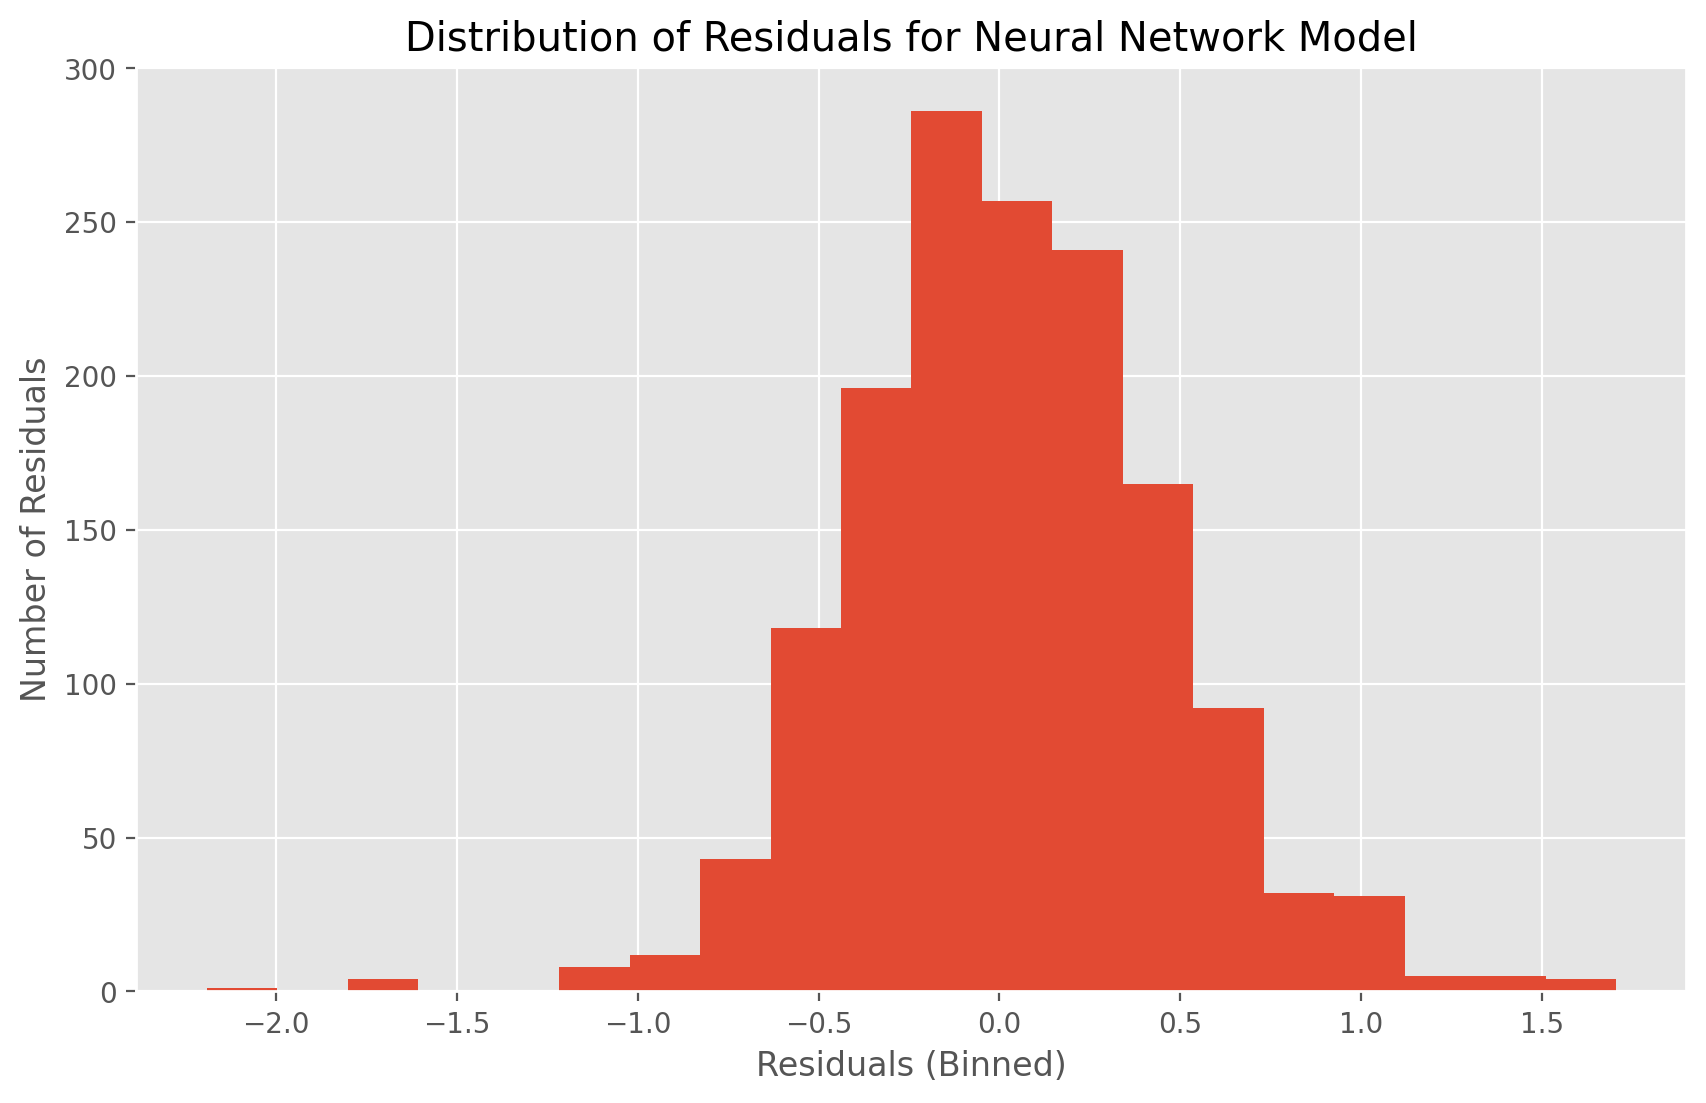

In [80]:
# Residual plot for NNM
residuals_NNM = t_test - predict_nn_y
plt.figure(figsize=(10, 6))
plt.hist(residuals_NNM,20)
plt.xlabel("Residuals (Binned)")
plt.ylabel("Number of Residuals")
plt.title("Distribution of Residuals for Neural Network Model")
plt.show()

Support Vector Regressor

In [81]:
# Support Vector Regressor
model_svr = SVR(kernel='rbf')
model_svr.fit(D_train_fs, t_train)
predict_svr_y = model_svr.predict(D_test_fs)
mse_svr = mean_squared_error(t_test, predict_svr_y)
print(f'Support Vector Regressor MSE: {mse_svr}')

#The Mean Squared Error(MSE) is to measure how well the models prediction matches the actual prediction/values. Higher MSE means that there is large difference between predicted and actual values in our model meaning the prediction of model is less accurate.
#Lower MSE means the values are much closer to the true values meaning the prediction is more accurate and will have a better performance.In this case we have an MSE of 0.19721585169418102 which is quite small which means that the prediction is very close to the actual value.
#To get the better idea and to see if this is true we have look at other models MSE too.

Support Vector Regressor MSE: 0.19721585169418102


In [82]:
SVR_scores = cross_val_score(model_svr, D_test_fs, t_test, cv=cv_method, scoring='r2')
SVR_scores.mean().round(3)

0.864

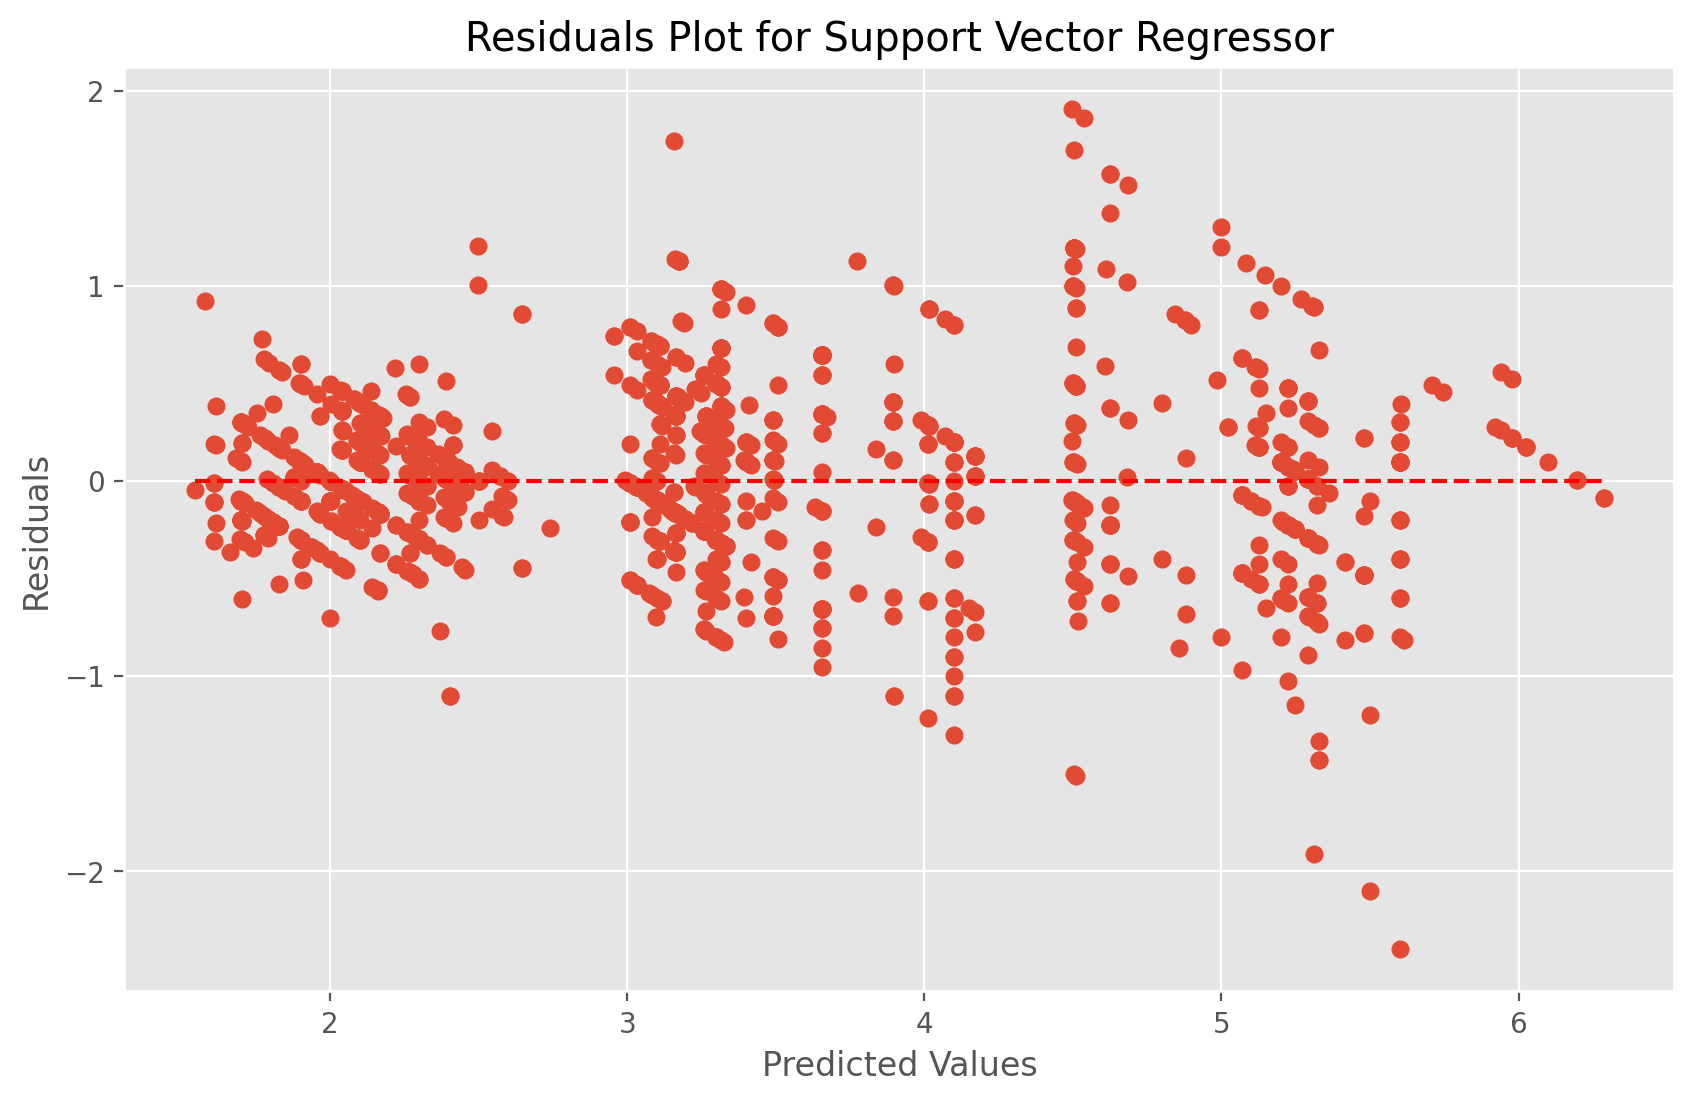

In [83]:
# Residual plot for SVR
residuals_SVR = t_test - predict_svr_y
plt.figure(figsize=(10, 6))
plt.scatter(predict_svr_y, residuals_SVR)
plt.hlines(y=0, xmin=predict_svr_y.min(), xmax=predict_svr_y.max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Support Vector Regressor")
plt.show()

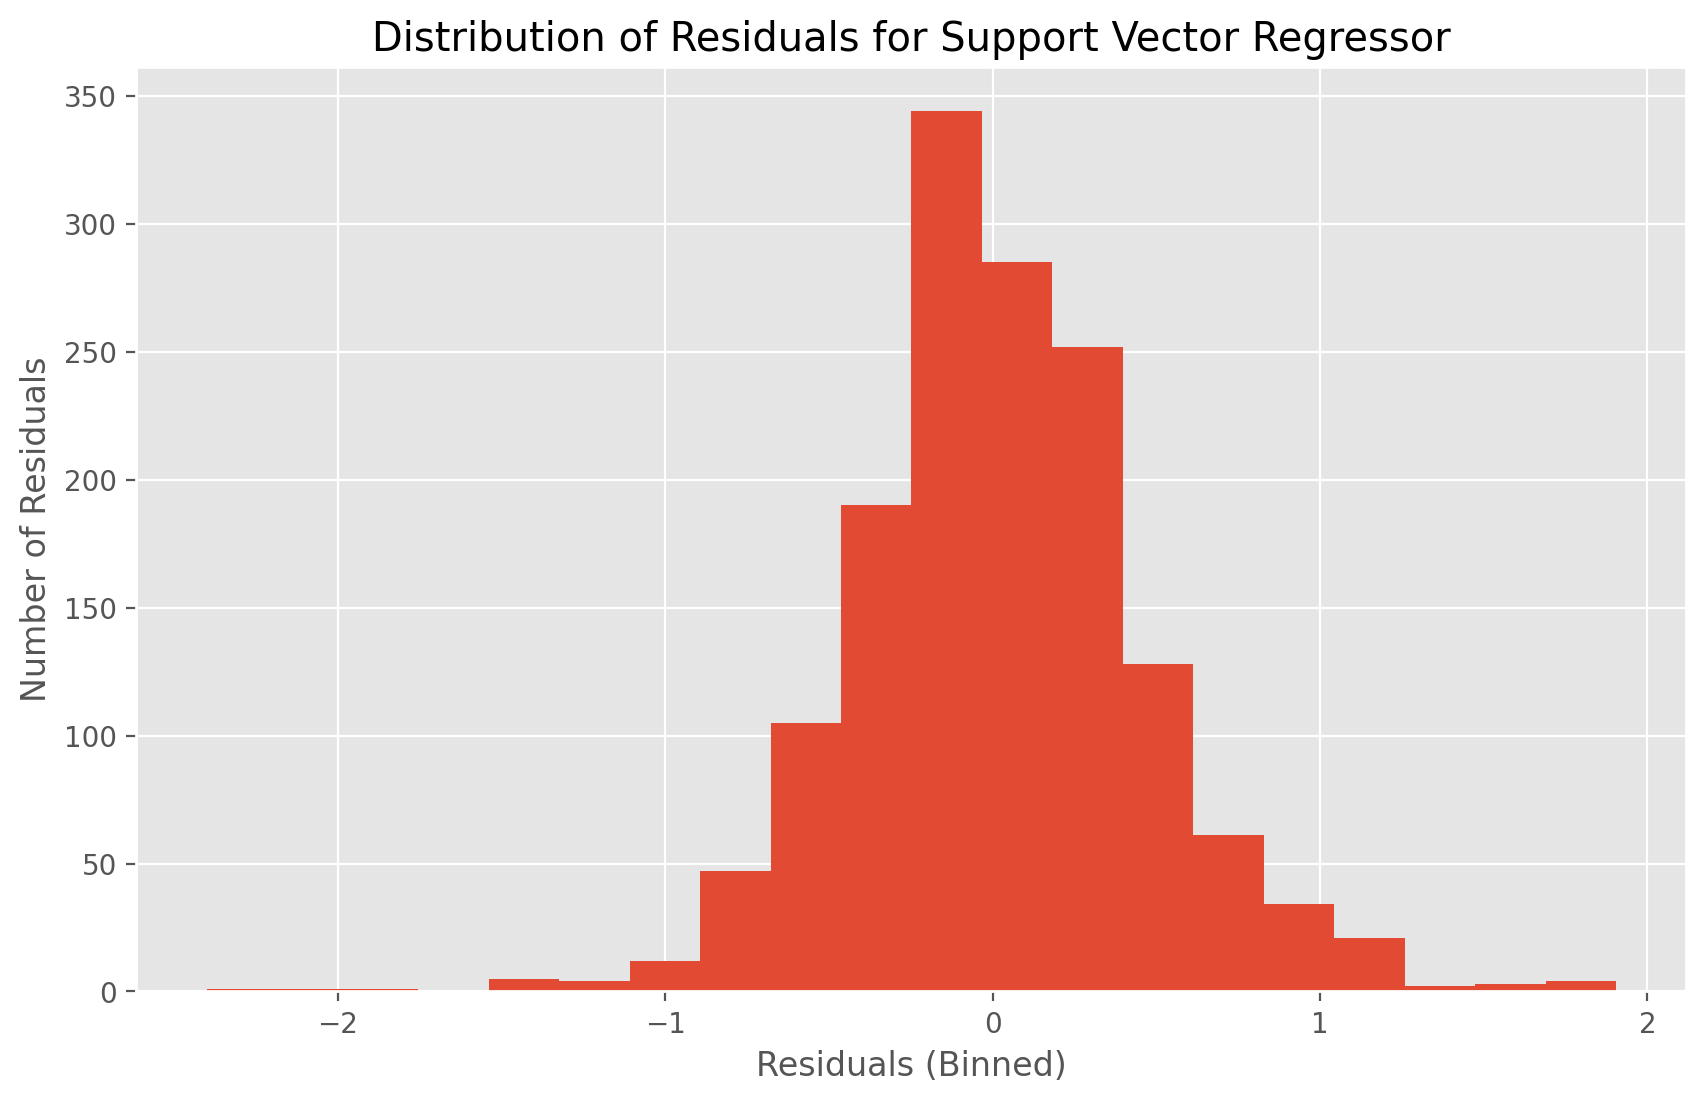

In [84]:
# Residual plot for SVR
residuals_SVR = t_test - predict_svr_y
plt.figure(figsize=(10, 6))
plt.hist(residuals_SVR,20)
plt.xlabel("Residuals (Binned)")
plt.ylabel("Number of Residuals")
plt.title("Distribution of Residuals for Support Vector Regressor")
plt.show()

### Model Comparison <a id='modeval'></a>

In [85]:
comparison_df = pd.DataFrame(columns=['Model A', 'Model B', 'Paired t-test t-statistic', 'p-value'])

In [86]:
#Comparing KNN with other models

In [87]:
t_stat, p_value = stats.ttest_rel(KNN_scores, DT_scores)
new_test = {'Model A': 'KNN', 'Model B': 'DT', 'Paired t-test t-statistic': t_stat.round(3), 'p-value': p_value.round(3)}
comparison_df = comparison_df.append(new_test, ignore_index=True)

In [88]:
t_stat, p_value = stats.ttest_rel(KNN_scores, GBR_scores)
new_test = {'Model A': 'KNN', 'Model B': 'GBR', 'Paired t-test t-statistic': t_stat.round(3), 'p-value': p_value.round(3)}
comparison_df = comparison_df.append(new_test, ignore_index=True)

In [89]:
t_stat, p_value = stats.ttest_rel(KNN_scores, NNM_scores)
new_test = {'Model A': 'KNN', 'Model B': 'NNM', 'Paired t-test t-statistic': t_stat.round(3), 'p-value': p_value.round(3)}
comparison_df = comparison_df.append(new_test, ignore_index=True)

In [90]:
t_stat, p_value = stats.ttest_rel(KNN_scores, SVR_scores)
new_test = {'Model A': 'KNN', 'Model B': 'SVR', 'Paired t-test t-statistic': t_stat.round(3), 'p-value': p_value.round(3)}
comparison_df = comparison_df.append(new_test, ignore_index=True)

In [91]:
#Comparing DT with other models

In [92]:
t_stat, p_value = stats.ttest_rel(DT_scores, GBR_scores)
new_test = {'Model A': 'DT', 'Model B': 'GBR', 'Paired t-test t-statistic': t_stat.round(3), 'p-value': p_value.round(3)}
comparison_df = comparison_df.append(new_test, ignore_index=True)

In [93]:
t_stat, p_value = stats.ttest_rel(DT_scores, NNM_scores)
new_test = {'Model A': 'DT', 'Model B': 'NNM', 'Paired t-test t-statistic': t_stat.round(3), 'p-value': p_value.round(3)}
comparison_df = comparison_df.append(new_test, ignore_index=True)

In [94]:
t_stat, p_value = stats.ttest_rel(DT_scores, SVR_scores)
new_test = {'Model A': 'DT', 'Model B': 'SVR', 'Paired t-test t-statistic': t_stat.round(3), 'p-value': p_value.round(3)}
comparison_df = comparison_df.append(new_test, ignore_index=True)

In [95]:
#Comparing GBR with other models

In [96]:
t_stat, p_value = stats.ttest_rel(GBR_scores, NNM_scores)
new_test = {'Model A': 'GBR', 'Model B': 'NNM', 'Paired t-test t-statistic': t_stat.round(3), 'p-value': p_value.round(3)}
comparison_df = comparison_df.append(new_test, ignore_index=True)

In [97]:
t_stat, p_value = stats.ttest_rel(GBR_scores, SVR_scores)
new_test = {'Model A': 'GBR', 'Model B': 'SVR', 'Paired t-test t-statistic': t_stat.round(3), 'p-value': p_value.round(3)}
comparison_df = comparison_df.append(new_test, ignore_index=True)

In [98]:
#Comparing NNM with other models

In [99]:
t_stat, p_value = stats.ttest_rel(NNM_scores, SVR_scores)
new_test = {'Model A': 'NNM', 'Model B': 'SVR', 'Paired t-test t-statistic': t_stat.round(3), 'p-value': p_value.round(3)}
comparison_df = comparison_df.append(new_test, ignore_index=True)

In [100]:
comparison_df.sort_values(by='p-value')

,Model A,Model B,Paired t-test t-statistic,p-value
8,GBR,SVR,4.756,0.000
9,NNM,SVR,7.516,0.000
1,KNN,GBR,-4.100,0.001
2,KNN,NNM,-3.774,0.002
0,KNN,DT,-3.043,0.009
6,DT,SVR,2.500,0.025
5,DT,NNM,-1.179,0.258
4,DT,GBR,-0.998,0.335
7,GBR,NNM,-0.945,0.361
3,KNN,SVR,0.564,0.582


## Critique & Limitations <a id='crit'></a>

| Model                  | Critique                                                                 | Limitations                                                                                  |
|------------------------|--------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| K-Nearest Neighbors (KNN) | - Simple and easy to implement                                       | - Computationally expensive for large datasets                                                |
|                        | - Non-parametric with no assumptions about data distribution            | - Sensitive to feature scaling and high-dimensional data                                      |
| Decision Tree Regressor | - Highly interpretable and easy to visualize                           | - Prone to overfitting and instability                                                        |
|                        | - Handles numerical and categorical data well                           | - Small changes in data can lead to different trees                                           |
| Gradient Boosting Regressor (GBR) | - High predictive accuracy by combining weak learners       | - Computationally intensive and time-consuming                                                |
|                        | - Flexible and handles various data types well                          | - Requires careful hyperparameter tuning to avoid overfitting                                 |
| MLPRegressor (Multi-Layer Perceptron) | - Can model complex relationships                       | - Resource-intensive and requires significant computational power                             |
|                        | - Flexible with the capability to approximate any continuous function   | - Prone to overfitting and less interpretable                                                 |
| Support Vector Regressor (SVR) | - Effective for high-dimensional spaces                        | - Computationally expensive to train                                                          |
|                        | - Robust to outliers in the target variable                             | - Sensitive to feature scaling and requires careful tuning                                    |




## Summary & Conclusions <a id='sum'></a>

### Project Summary <a id='prosum'></a>

The dataset on `Vehicle Fuel Economy` was obtained from Kaggle (Maharaj, 2024).  The dataset comprises vehicle models ranging from 1984 to 2017. The dataset on Kaggle has been derived from a larger dataset sourced from the US Department of Energy, Office of Energy Efficiency & Renewable Energy. The dataset consists of 38,113 observations and 81 columns. 

During the initial phase of this project, we completed the tasks of data cleaning and preprocessing, as well as data visualisation. Initially, we made the decision to eliminate 61 variables that we deemed irrelevant for predictive modelling. Additionally, we designated `vehicle_id` as the index value. During the additional data cleaning process, we examined the sum of missing values (`na`) and discovered that the column `start_stop_technology` had a total of `38113` missing values. Consequently, we made the decision to eliminate this column from the dataset.


The class variable required cleaning, and we replaced the values `2WD, 4WD, /, -` with an empty string due to fluctuating data. However, the meaning of these values remains unchanged. We applied the same procedure to the class column. In the `Transmission` category, we have identified two types of transmission: `Auto` and `Manual`. These types have been derived from the raw data. We introduced a new feature called data['gear'] and extracted all decimal values of gears from data['gear2']. Subsequently, we discarded this feature as it was no longer necessary. The feature 'fuel_type' was modified to include four distinct types: 'Premium Plug-in Hybrid', 'Regular Plug-in Hybrid', 'Premium Hybrid', and 'Regular Hybrid', based on the raw data. Finally, any duplicate entries were removed.

We created multiple visual representations to analyse the data. It is evident that the yearly expense for fuel rises progressively with an increase in the number of engine cylinders. Heavier vehicles necessitate a greater number of cylinders, resulting in an enlarged piston surface area and increased fuel consumption. Engines with a greater number of cylinders produce higher levels of power, however, they also require a greater amount of fuel for operation. 

It is crucial to be aware of the fuel type being used, and our findings indicate that the majority of people use `Regular gasoline`, followed by `Premium gasoline`, and then `diesel`.Another observation is that Compact cars have the highest quantity, closely followed by subcompact cars, pickup trucks, and sport utility vehicles.

It has been noted that vehicles with a maximum of 4 cylinders typically use regular gasoline, while vehicles with 10 cylinders use premium gasoline.

The initial dataset comprises 81 attributes, including transmission, cylinders, fuel type, fuel consumption, and CO2 emissions. The total number of records is 38,113. We will commence with the cleaning and preprocessing of the data. We will eliminate the extraneous data and designate `vehicle_id` as the index value. Next, we will eliminate all the null values and eliminate any duplicate entries. Next, we will perform pre-processing on the category features, during which we have made modifications to the data in order to ensure that all values have the same meaning. We extracted the data related to gears and created a new column named 'gear'. The `fuel_type` variable contains various observations that share a common meaning. Therefore, we have simplified the values by abstracting them into a single value with the same meaning. After identifying the outliers through the box plot, we proceeded to encode, scale, and split the dataset.

We collected a sample of 5000 random data points and created a target feature. We then applied One-Hot Encoding to categorical features with more than 2 levels, which converted the data into binary columns. This standardised format allows for further analysis. 


Next, we utilise the `Mutual information` to conduct `Predictive Modelling` in finding the best features. and proceed to the stage of `Model Fitting and Tuning`. The following machine learning algorithms were utilised: 
- K-Nearest Neighbours (KNN) 
- Decision Tree Regressor 
- Gradient Boosting Regressor 
- MLP Regressor 
- Support Vector Regressor. 


By selecting these 5 specific descriptive features from the original set of 46, we have achieved a slightly improved r-squared value of 0.001, indicating a better alignment with the target variable.

Next, we conducted hyperparameter optimisation for the `K-Nearest Neighbours` (KNN) regressor using grid search with cross-validation. We then visualised the results and identified the best score of `-0.1831`, which represents the model's predictive accuracy. Upon analysis, we have found that the `DT` score is `-0.1824`, the `GradientBoostingRegressor` score is `-0.1723`, the `MLPRegressor` score is `-0.1751`, and the `Support Vector Regressor` MSE is `0.1972`. A lower MSE indicates that the predicted values are closer to the true values, resulting in more accurate predictions and better performance.In this instance, the `mean squared error (MSE)` is calculated to be `0.003728424862048869`, indicating a significantly small discrepancy between the predicted value and the actual value. We drafted graph two graphs `Residual` and `distribution of residual` in which we observed that most of the values are between to the `0` zero and `-5` which indicates a healthy result and output.

We tuned a KNN regressor hyperparameter using cross-validation. For reproducibility, it uses the KFold method to create a cross-validation strategy with `5 splits`, shuffling data and setting a random state. The KNN model's parameter grid includes 1 to 29 neighbours and distance metrics p with values `1` (Manhattan distance) and `2` (Euclidean distance). `GridSearchCV` is then used to exhaustively search the parameter grid and score model performance using negative mean squared error. Visualising progress with verbose output, the grid search finds the optimal KNN regressor hyperparameters. We found the best score in negative and MSE is `0.1811`. 
 
For DTR the hyperparameter grid consists of max_depth values ranging from 1 to 11 and min_samples_split values of 2, 5, 15, 20, and 25. The GridSearchCV function systematically evaluates each combination of parameters using a `5-fold cross-validation strategy` (cv_method_train), with `negative` mean squared error as the scoring metric. The grid search procedure, which offers detailed tracking through verbose output, determines the optimal hyperparameters that result in the highest predictive performance on the training dataset. The optimal hyperparameters and their corresponding highest score are displayed, providing a concise summary of the tuning outcomes for the Decision Tree Regressor.

Whereas in GBR the hyperparameter grid contains values for n_estimators that range from 0 to 480, with increments of `20`. The GridSearchCV function employs a `5-fold cross-validation strategy` (cv_method_train) to systematically assess each combination of the parameters. We found that best score was `-0.1723` and MSE `0.1772`. 

For MLPRegressor the hyperparameter grid consists of two activation functions, `'relu'` and `'tanh'`, and max_iter values that range from `100 to 400` in increments of `100`. The `GridSearchCV` function employs a `5-fold cross-validation strategy` (cv_method_train) to systematically assess each parameter combination, utilising negative mean squared error as the scoring metric. The best score was `0.1751` and MSE `0.1903`.

we also used the support vector regressor that gave us a `lower` MSE means the values are much closer to the true values meaning the prediction is more accurate and will have a better performance.In this case we have an MSE of `0.003728424862048869` which is quite `small` which means that the prediction is very close to the actual value.

Recently, we conducted a model comparison and discovered that GBR, NNM, and DT significantly outperformed SVR and KNN.




### Summary of Findings <a id='find'></a>

Based on the model comparsion we found an observartion on the models:

- `Strong Performing models`:

1. GBR and NNM consistently show superior performance, significantly outperforming SVR.
2. DT also shows competitive performance, outperforming SVR and KNN in significant comparisons.

- `Weak Performing models`:

1. KNN performs poorly compared to GBR, NNM, and DT, showing significant underperformance in multiple comparisons.
2. SVR is consistently outperformed by GBR, NNM, and DT.


So we can say that GBR > NNM > SVR. 

### Conclusions <a id='con'></a>

After looking to the data set and all the feature variables we came to a conclusion that GBR and NNM are the best model to predict the future outcome.

## References <a id='ref'></a>

#### Kelleher, J. D., Mac, N. B., & D'Arcy, A. (2015). *Fundamentals of machine learning for predictive data analytics : Algorithms, worked examples, and case studies.* MIT Press.

#### Maharaj, S. (2024). *Vehicle Fuel Economy* [Data set]. Kaggle. https://www.kaggle.com/datasets/sahirmaharajj/fuel-economy

#### US Department of Energy. (2024). *FuelEconomy.gov Web Services*. https://www.fueleconomy.gov/feg/ws/#ft11